from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 20:58:50.103286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 20:58:50.289840: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 20:58:50.294534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 20:58:50.294552: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationD.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
BODD = df["BODD"]

X1, y1 = df_to_X_y(BODD, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

Epoch 1/30


2024-03-08 20:58:52.097135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 20:58:52.097196: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 20:58:52.097229: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 20:58:52.097644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/8 [==>...........................] - ETA: 2s - loss: 985.2076 - root_mean_squared_error: 31.3880

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 108ms/step - loss: 1047.8597 - root_mean_squared_error: 32.3707 - val_loss: 1087.3389 - val_root_mean_squared_error: 32.9748
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1096.7999 - root_mean_squared_error: 33.1180

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 64ms/step - loss: 1016.0625 - root_mean_squared_error: 31.8757 - val_loss: 1054.1675 - val_root_mean_squared_error: 32.4679
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 949.6715 - root_mean_squared_error: 30.8167

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 103ms/step - loss: 984.8667 - root_mean_squared_error: 31.3826 - val_loss: 1023.9195 - val_root_mean_squared_error: 31.9987
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 946.1561 - root_mean_squared_error: 30.7597

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 109ms/step - loss: 966.7170 - root_mean_squared_error: 31.0921 - val_loss: 1018.9917 - val_root_mean_squared_error: 31.9216
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 940.1602 - root_mean_squared_error: 30.6620

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 77ms/step - loss: 962.0335 - root_mean_squared_error: 31.0167 - val_loss: 1013.9775 - val_root_mean_squared_error: 31.8430
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 996.3253 - root_mean_squared_error: 31.5646

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 93ms/step - loss: 957.2853 - root_mean_squared_error: 30.9400 - val_loss: 1008.8654 - val_root_mean_squared_error: 31.7626
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 1026.6406 - root_mean_squared_error: 32.0412

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 952.3976 - root_mean_squared_error: 30.8609 - val_loss: 1003.6129 - val_root_mean_squared_error: 31.6798
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 945.0402 - root_mean_squared_error: 30.7415

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 118ms/step - loss: 947.3802 - root_mean_squared_error: 30.7795 - val_loss: 998.2089 - val_root_mean_squared_error: 31.5944
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 917.7824 - root_mean_squared_error: 30.2949

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 85ms/step - loss: 942.1808 - root_mean_squared_error: 30.6950 - val_loss: 992.6307 - val_root_mean_squared_error: 31.5060
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 922.4506 - root_mean_squared_error: 30.3719

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 936.8643 - root_mean_squared_error: 30.6082 - val_loss: 986.8676 - val_root_mean_squared_error: 31.4144
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 877.6603 - root_mean_squared_error: 29.6253

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 92ms/step - loss: 931.3622 - root_mean_squared_error: 30.5182 - val_loss: 980.9817 - val_root_mean_squared_error: 31.3206
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 970.9034 - root_mean_squared_error: 31.1593

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 925.7411 - root_mean_squared_error: 30.4260 - val_loss: 974.8885 - val_root_mean_squared_error: 31.2232
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 942.2230 - root_mean_squared_error: 30.6957

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 184ms/step - loss: 919.8920 - root_mean_squared_error: 30.3297 - val_loss: 968.5463 - val_root_mean_squared_error: 31.1215
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 890.3067 - root_mean_squared_error: 29.8380

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 137ms/step - loss: 913.8221 - root_mean_squared_error: 30.2295 - val_loss: 962.0253 - val_root_mean_squared_error: 31.0165
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 803.6697 - root_mean_squared_error: 28.3491

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 119ms/step - loss: 907.6119 - root_mean_squared_error: 30.1266 - val_loss: 955.4312 - val_root_mean_squared_error: 30.9100
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 839.4291 - root_mean_squared_error: 28.9729

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 111ms/step - loss: 901.3120 - root_mean_squared_error: 30.0219 - val_loss: 948.6273 - val_root_mean_squared_error: 30.7998
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 916.6322 - root_mean_squared_error: 30.2759

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 165ms/step - loss: 894.8591 - root_mean_squared_error: 29.9142 - val_loss: 941.6417 - val_root_mean_squared_error: 30.6862
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 997.9354 - root_mean_squared_error: 31.5901

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 173ms/step - loss: 888.2367 - root_mean_squared_error: 29.8033 - val_loss: 934.4979 - val_root_mean_squared_error: 30.5696
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 880.0055 - root_mean_squared_error: 29.6649

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 247ms/step - loss: 881.3888 - root_mean_squared_error: 29.6882 - val_loss: 927.2353 - val_root_mean_squared_error: 30.4505
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 857.1978 - root_mean_squared_error: 29.2779

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 174ms/step - loss: 874.4811 - root_mean_squared_error: 29.5716 - val_loss: 919.8066 - val_root_mean_squared_error: 30.3283
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 857.9943 - root_mean_squared_error: 29.2915

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 287ms/step - loss: 867.3912 - root_mean_squared_error: 29.4515 - val_loss: 912.1622 - val_root_mean_squared_error: 30.2020
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 759.6784 - root_mean_squared_error: 27.5623

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 143ms/step - loss: 860.0737 - root_mean_squared_error: 29.3270 - val_loss: 904.3511 - val_root_mean_squared_error: 30.0724
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 868.0358 - root_mean_squared_error: 29.4624

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 147ms/step - loss: 852.6218 - root_mean_squared_error: 29.1997 - val_loss: 896.2712 - val_root_mean_squared_error: 29.9378
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 927.3799 - root_mean_squared_error: 30.4529

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 157ms/step - loss: 844.9763 - root_mean_squared_error: 29.0685 - val_loss: 888.0519 - val_root_mean_squared_error: 29.8002
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 840.1329 - root_mean_squared_error: 28.9850

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 145ms/step - loss: 837.0904 - root_mean_squared_error: 28.9325 - val_loss: 879.6809 - val_root_mean_squared_error: 29.6594
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 840.8940 - root_mean_squared_error: 28.9982

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 829.1227 - root_mean_squared_error: 28.7945 - val_loss: 871.0646 - val_root_mean_squared_error: 29.5138
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 927.4230 - root_mean_squared_error: 30.4536

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 820.8798 - root_mean_squared_error: 28.6510 - val_loss: 862.2218 - val_root_mean_squared_error: 29.3636
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 846.4613 - root_mean_squared_error: 29.0940

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 812.4707 - root_mean_squared_error: 28.5039 - val_loss: 853.2054 - val_root_mean_squared_error: 29.2097
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 813.0773 - root_mean_squared_error: 28.5145

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 148ms/step - loss: 803.8640 - root_mean_squared_error: 28.3525 - val_loss: 843.9742 - val_root_mean_squared_error: 29.0512
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 780.8231 - root_mean_squared_error: 27.9432

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 2ms/step


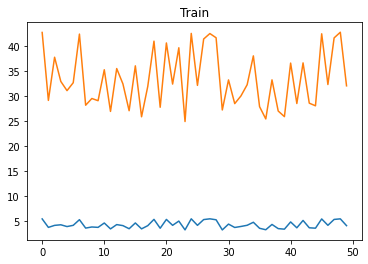

2/2 [==============================] - 0s 5ms/step


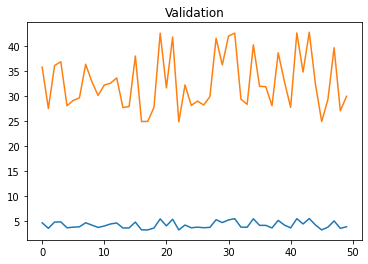

3/3 [==============================] - 0s 3ms/step


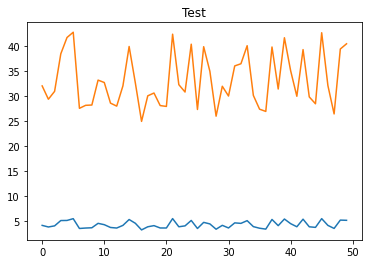

3/3 [==============================] - 0s 4ms/step


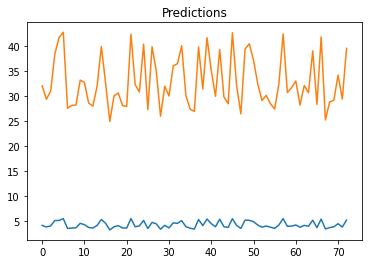

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1051.5477 - root_mean_squared_error: 32.4276 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 819ms/step - loss: 1051.5477 - root_mean_squared_error: 32.4276 - val_loss: 1106.5563 - val_root_mean_squared_error: 33.2649
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1045.0503 - root_mean_squared_error: 32.3272

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 650ms/step - loss: 1045.0503 - root_mean_squared_error: 32.3272 - val_loss: 1099.9719 - val_root_mean_squared_error: 33.1658
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 1041.3043 - root_mean_squared_error: 32.2692

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 899ms/step - loss: 1038.5690 - root_mean_squared_error: 32.2268 - val_loss: 1093.4287 - val_root_mean_squared_error: 33.0670
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 1007.3560 - root_mean_squared_error: 31.7389

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 796ms/step - loss: 1032.1282 - root_mean_squared_error: 32.1268 - val_loss: 1086.9426 - val_root_mean_squared_error: 32.9688
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 983.2653 - root_mean_squared_error: 31.3571

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 801ms/step - loss: 1025.7540 - root_mean_squared_error: 32.0274 - val_loss: 1080.4762 - val_root_mean_squared_error: 32.8706
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 1017.9675 - root_mean_squared_error: 31.9056

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 941ms/step - loss: 1019.3958 - root_mean_squared_error: 31.9280 - val_loss: 1074.0420 - val_root_mean_squared_error: 32.7726
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 1012.2125 - root_mean_squared_error: 31.8153

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1013.0453 - root_mean_squared_error: 31.8284 - val_loss: 1067.6194 - val_root_mean_squared_error: 32.6744
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 1006.3052 - root_mean_squared_error: 31.7223

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 920ms/step - loss: 1006.7029 - root_mean_squared_error: 31.7286 - val_loss: 1061.1797 - val_root_mean_squared_error: 32.5758
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 1093.2096 - root_mean_squared_error: 33.0637

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 988ms/step - loss: 1000.3365 - root_mean_squared_error: 31.6281 - val_loss: 1054.6996 - val_root_mean_squared_error: 32.4761
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 993.8983 - root_mean_squared_error: 31.5262 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 832ms/step - loss: 993.8983 - root_mean_squared_error: 31.5262 - val_loss: 1048.1774 - val_root_mean_squared_error: 32.3756
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 952.9084 - root_mean_squared_error: 30.8692

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 987.4094 - root_mean_squared_error: 31.4231 - val_loss: 1041.5531 - val_root_mean_squared_error: 32.2731
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 967.0197 - root_mean_squared_error: 31.0969

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 980.8055 - root_mean_squared_error: 31.3178 - val_loss: 1034.8076 - val_root_mean_squared_error: 32.1684
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 996.7324 - root_mean_squared_error: 31.5711

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 974.0748 - root_mean_squared_error: 31.2102 - val_loss: 1027.9011 - val_root_mean_squared_error: 32.0609
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 967.1740 - root_mean_squared_error: 31.0994 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 895ms/step - loss: 967.1740 - root_mean_squared_error: 31.0994 - val_loss: 1020.8194 - val_root_mean_squared_error: 31.9503
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 952.3132 - root_mean_squared_error: 30.8596

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 960.0977 - root_mean_squared_error: 30.9854 - val_loss: 1013.5520 - val_root_mean_squared_error: 31.8363
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 948.8002 - root_mean_squared_error: 30.8026

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 952.8382 - root_mean_squared_error: 30.8681 - val_loss: 1006.1020 - val_root_mean_squared_error: 31.7191
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 943.5024 - root_mean_squared_error: 30.7165

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 945.4144 - root_mean_squared_error: 30.7476 - val_loss: 998.4598 - val_root_mean_squared_error: 31.5984
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 937.7961 - root_mean_squared_error: 30.6235

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 951ms/step - loss: 937.7961 - root_mean_squared_error: 30.6235 - val_loss: 990.6625 - val_root_mean_squared_error: 31.4748
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 945.3494 - root_mean_squared_error: 30.7465

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 913ms/step - loss: 930.0729 - root_mean_squared_error: 30.4971 - val_loss: 982.6935 - val_root_mean_squared_error: 31.3479
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 916.6893 - root_mean_squared_error: 30.2769

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 922.1870 - root_mean_squared_error: 30.3675 - val_loss: 974.6296 - val_root_mean_squared_error: 31.2191
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 842.7814 - root_mean_squared_error: 29.0307

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 914.2159 - root_mean_squared_error: 30.2360 - val_loss: 966.4561 - val_root_mean_squared_error: 31.0879
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 990.2446 - root_mean_squared_error: 31.4682

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 906.1862 - root_mean_squared_error: 30.1029 - val_loss: 958.1864 - val_root_mean_squared_error: 30.9546
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 887.3379 - root_mean_squared_error: 29.7882

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 898.0230 - root_mean_squared_error: 29.9670 - val_loss: 949.9003 - val_root_mean_squared_error: 30.8205
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 867.7332 - root_mean_squared_error: 29.4573

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 889.8669 - root_mean_squared_error: 29.8306 - val_loss: 941.5473 - val_root_mean_squared_error: 30.6846
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 932.7429 - root_mean_squared_error: 30.5408

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 881.6519 - root_mean_squared_error: 29.6926 - val_loss: 933.1066 - val_root_mean_squared_error: 30.5468
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 859.4298 - root_mean_squared_error: 29.3160

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 873.3677 - root_mean_squared_error: 29.5528 - val_loss: 924.6313 - val_root_mean_squared_error: 30.4078
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 868.4465 - root_mean_squared_error: 29.4694

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 865.0445 - root_mean_squared_error: 29.4116 - val_loss: 916.1094 - val_root_mean_squared_error: 30.2673
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 854.7985 - root_mean_squared_error: 29.2369

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 856.6633 - root_mean_squared_error: 29.2688 - val_loss: 907.5496 - val_root_mean_squared_error: 30.1256
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 848.2786 - root_mean_squared_error: 29.1252

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 848.2786 - root_mean_squared_error: 29.1252 - val_loss: 898.9238 - val_root_mean_squared_error: 29.9821
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 876.9677 - root_mean_squared_error: 29.6136

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 1s 5ms/step


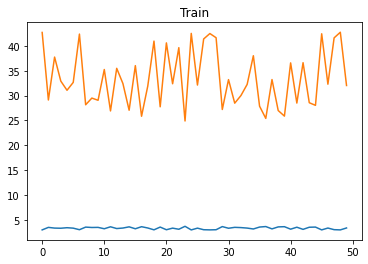

2/2 [==============================] - 1s 6ms/step


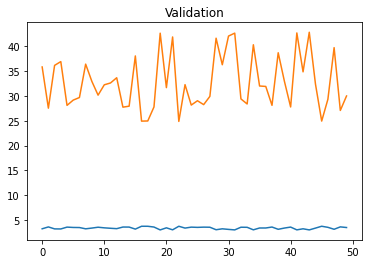

3/3 [==============================] - 0s 7ms/step


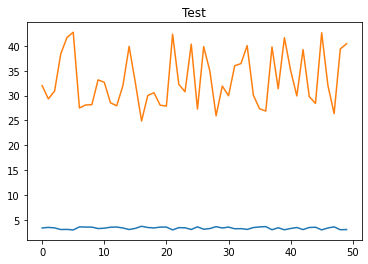

3/3 [==============================] - 0s 8ms/step


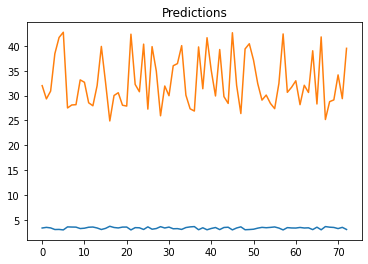

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1039.5464 - root_mean_squared_error: 32.2420 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 1038.9916 - root_mean_squared_error: 32.2334 - val_loss: 1097.2515 - val_root_mean_squared_error: 33.1248
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 1033.5822 - root_mean_squared_error: 32.1494

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1037.0330 - root_mean_squared_error: 32.2030 - val_loss: 1096.0361 - val_root_mean_squared_error: 33.1064
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1036.3542 - root_mean_squared_error: 32.1925

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 760ms/step - loss: 1036.3542 - root_mean_squared_error: 32.1925 - val_loss: 1095.6591 - val_root_mean_squared_error: 33.1007
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 935.6102 - root_mean_squared_error: 30.5877

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 781ms/step - loss: 1035.9619 - root_mean_squared_error: 32.1864 - val_loss: 1095.2327 - val_root_mean_squared_error: 33.0943
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 1035.5286 - root_mean_squared_error: 32.1796

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 674ms/step - loss: 1035.5286 - root_mean_squared_error: 32.1796 - val_loss: 1094.7731 - val_root_mean_squared_error: 33.0874
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 1065.7334 - root_mean_squared_error: 32.6456

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 918ms/step - loss: 1035.0632 - root_mean_squared_error: 32.1724 - val_loss: 1094.2837 - val_root_mean_squared_error: 33.0800
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 1003.1385 - root_mean_squared_error: 31.6724

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 744ms/step - loss: 1034.5714 - root_mean_squared_error: 32.1648 - val_loss: 1093.7645 - val_root_mean_squared_error: 33.0721
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 1016.1572 - root_mean_squared_error: 31.8772

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 728ms/step - loss: 1034.0479 - root_mean_squared_error: 32.1566 - val_loss: 1093.2166 - val_root_mean_squared_error: 33.0638
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 1046.7968 - root_mean_squared_error: 32.3542

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 792ms/step - loss: 1033.4974 - root_mean_squared_error: 32.1481 - val_loss: 1092.6367 - val_root_mean_squared_error: 33.0551
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 1063.7817 - root_mean_squared_error: 32.6157

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 704ms/step - loss: 1032.9138 - root_mean_squared_error: 32.1390 - val_loss: 1092.0247 - val_root_mean_squared_error: 33.0458
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 967.5803 - root_mean_squared_error: 31.1060

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 888ms/step - loss: 1032.2965 - root_mean_squared_error: 32.1294 - val_loss: 1091.3760 - val_root_mean_squared_error: 33.0360
Epoch 12/30
4/8 [==============>...............] - ETA: 0s - loss: 1055.8152 - root_mean_squared_error: 32.4933

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1031.6447 - root_mean_squared_error: 32.1192 - val_loss: 1090.6888 - val_root_mean_squared_error: 33.0256
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 1028.6475 - root_mean_squared_error: 32.0725

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1030.9510 - root_mean_squared_error: 32.1084 - val_loss: 1089.9620 - val_root_mean_squared_error: 33.0146
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 1092.5010 - root_mean_squared_error: 33.0530

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1030.2190 - root_mean_squared_error: 32.0970 - val_loss: 1089.1898 - val_root_mean_squared_error: 33.0029
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 1026.3822 - root_mean_squared_error: 32.0372

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1029.4421 - root_mean_squared_error: 32.0849 - val_loss: 1088.3706 - val_root_mean_squared_error: 32.9905
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 1028.6146 - root_mean_squared_error: 32.0720

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1028.6146 - root_mean_squared_error: 32.0720 - val_loss: 1087.4993 - val_root_mean_squared_error: 32.9773
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 1034.9388 - root_mean_squared_error: 32.1705

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1027.7347 - root_mean_squared_error: 32.0583 - val_loss: 1086.5675 - val_root_mean_squared_error: 32.9631
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 974.1381 - root_mean_squared_error: 31.2112

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1026.7948 - root_mean_squared_error: 32.0436 - val_loss: 1085.5729 - val_root_mean_squared_error: 32.9480
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 1060.8364 - root_mean_squared_error: 32.5705

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1025.7894 - root_mean_squared_error: 32.0279 - val_loss: 1084.5116 - val_root_mean_squared_error: 32.9319
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1026.8988 - root_mean_squared_error: 32.0453

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1024.7219 - root_mean_squared_error: 32.0113 - val_loss: 1083.3799 - val_root_mean_squared_error: 32.9147
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 1125.8521 - root_mean_squared_error: 33.5537

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1023.5886 - root_mean_squared_error: 31.9936 - val_loss: 1082.1788 - val_root_mean_squared_error: 32.8965
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 1032.9905 - root_mean_squared_error: 32.1402

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1022.3843 - root_mean_squared_error: 31.9747 - val_loss: 1080.9167 - val_root_mean_squared_error: 32.8773
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 924.1034 - root_mean_squared_error: 30.3991

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1021.1276 - root_mean_squared_error: 31.9551 - val_loss: 1079.6016 - val_root_mean_squared_error: 32.8573
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 1060.8877 - root_mean_squared_error: 32.5713

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 936ms/step - loss: 1019.8275 - root_mean_squared_error: 31.9347 - val_loss: 1078.2399 - val_root_mean_squared_error: 32.8366
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 1016.0612 - root_mean_squared_error: 31.8757

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 1018.3564 - root_mean_squared_error: 31.9117 - val_loss: 1075.7991 - val_root_mean_squared_error: 32.7994
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 1048.2192 - root_mean_squared_error: 32.3762

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 1014.3121 - root_mean_squared_error: 31.8483 - val_loss: 1068.8224 - val_root_mean_squared_error: 32.6928
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 1055.5825 - root_mean_squared_error: 32.4897

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1006.9704 - root_mean_squared_error: 31.7328 - val_loss: 1060.8461 - val_root_mean_squared_error: 32.5706
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 943.0497 - root_mean_squared_error: 30.7091

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 999.1860 - root_mean_squared_error: 31.6099 - val_loss: 1053.0790 - val_root_mean_squared_error: 32.4512
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 921.1520 - root_mean_squared_error: 30.3505

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 991.7590 - root_mean_squared_error: 31.4922 - val_loss: 1045.6824 - val_root_mean_squared_error: 32.3370
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 984.6334 - root_mean_squared_error: 31.3789

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 1s 5ms/step


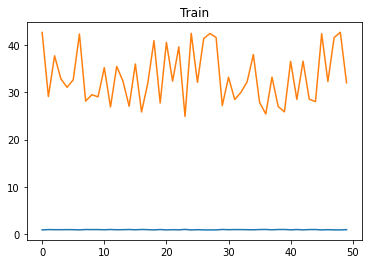

2/2 [==============================] - 1s 5ms/step


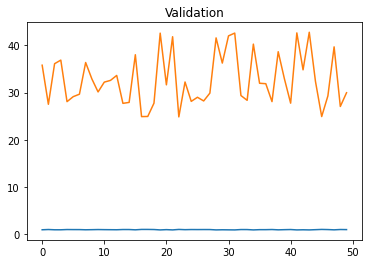

3/3 [==============================] - 0s 4ms/step


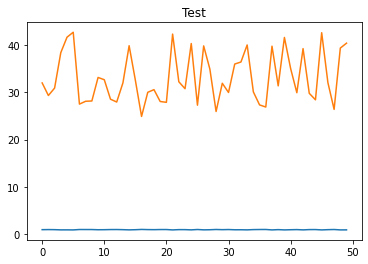

3/3 [==============================] - 0s 4ms/step


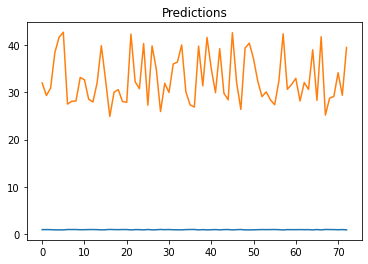

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 14s - loss: 1026.8645 - root_mean_squared_error: 32.0447INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 749ms/step - loss: 1023.7452 - root_mean_squared_error: 31.9960 - val_loss: 1077.6669 - val_root_mean_squared_error: 32.8278
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1055.4453 - root_mean_squared_error: 32.4876INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 510ms/step - loss: 1015.6227 - root_mean_squared_error: 31.8688 - val_loss: 1069.3206 - val_root_mean_squared_error: 32.7005
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1022.8062 - root_mean_squared_error: 31.9813INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 1007.4007 - root_mean_squared_error: 31.7396 - val_loss: 1060.9183 - val_root_mean_squared_error: 32.5717
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 1008.7166 - root_mean_squared_error: 31.7603INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 513ms/step - loss: 999.0975 - root_mean_squared_error: 31.6085 - val_loss: 1052.3214 - val_root_mean_squared_error: 32.4395
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 1018.7217 - root_mean_squared_error: 31.9174INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 633ms/step - loss: 990.5557 - root_mean_squared_error: 31.4731 - val_loss: 1043.4700 - val_root_mean_squared_error: 32.3028
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 968.5919 - root_mean_squared_error: 31.1222INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 981.7426 - root_mean_squared_error: 31.3328 - val_loss: 1034.2561 - val_root_mean_squared_error: 32.1599
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 980.5306 - root_mean_squared_error: 31.3134INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 972.5657 - root_mean_squared_error: 31.1860 - val_loss: 1024.6000 - val_root_mean_squared_error: 32.0094
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 998.2297 - root_mean_squared_error: 31.5948INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 487ms/step - loss: 962.9513 - root_mean_squared_error: 31.0315 - val_loss: 1014.4154 - val_root_mean_squared_error: 31.8499
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 948.8315 - root_mean_squared_error: 30.8031INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 952.7469 - root_mean_squared_error: 30.8666 - val_loss: 1003.7119 - val_root_mean_squared_error: 31.6814
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 960.8535 - root_mean_squared_error: 30.9976INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 942.1542 - root_mean_squared_error: 30.6945 - val_loss: 992.4993 - val_root_mean_squared_error: 31.5040
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 973.8127 - root_mean_squared_error: 31.2060INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 931.1775 - root_mean_squared_error: 30.5152 - val_loss: 981.1183 - val_root_mean_squared_error: 31.3228
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 875.3595 - root_mean_squared_error: 29.5865INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 920.0458 - root_mean_squared_error: 30.3323 - val_loss: 969.7714 - val_root_mean_squared_error: 31.1412
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 909.8434 - root_mean_squared_error: 30.1636INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 539ms/step - loss: 909.1210 - root_mean_squared_error: 30.1516 - val_loss: 958.6362 - val_root_mean_squared_error: 30.9619
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 858.2162 - root_mean_squared_error: 29.2953INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 539ms/step - loss: 898.4407 - root_mean_squared_error: 29.9740 - val_loss: 947.8546 - val_root_mean_squared_error: 30.7872
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 897.2814 - root_mean_squared_error: 29.9547INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 888.1121 - root_mean_squared_error: 29.8012 - val_loss: 937.4988 - val_root_mean_squared_error: 30.6186
Epoch 16/30
3/8 [==========>...................] - ETA: 0s - loss: 899.5963 - root_mean_squared_error: 29.9933INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 480ms/step - loss: 878.2031 - root_mean_squared_error: 29.6345 - val_loss: 927.4477 - val_root_mean_squared_error: 30.4540
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 831.3306 - root_mean_squared_error: 28.8328INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 868.5167 - root_mean_squared_error: 29.4706 - val_loss: 917.7613 - val_root_mean_squared_error: 30.2946
Epoch 18/30
4/8 [==============>...............] - ETA: 0s - loss: 864.6863 - root_mean_squared_error: 29.4055INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 589ms/step - loss: 859.1495 - root_mean_squared_error: 29.3113 - val_loss: 908.1611 - val_root_mean_squared_error: 30.1357
Epoch 19/30
4/8 [==============>...............] - ETA: 0s - loss: 851.4436 - root_mean_squared_error: 29.1795INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 510ms/step - loss: 849.8246 - root_mean_squared_error: 29.1518 - val_loss: 898.6418 - val_root_mean_squared_error: 29.9774
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 840.5096 - root_mean_squared_error: 28.9915INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 461ms/step - loss: 840.5096 - root_mean_squared_error: 28.9915 - val_loss: 889.1411 - val_root_mean_squared_error: 29.8185
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 790.8004 - root_mean_squared_error: 28.1212INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 482ms/step - loss: 831.1338 - root_mean_squared_error: 28.8294 - val_loss: 879.5308 - val_root_mean_squared_error: 29.6569
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 784.3099 - root_mean_squared_error: 28.0055INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 550ms/step - loss: 821.6003 - root_mean_squared_error: 28.6636 - val_loss: 869.6705 - val_root_mean_squared_error: 29.4902
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 812.0980 - root_mean_squared_error: 28.4973INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 535ms/step - loss: 811.7552 - root_mean_squared_error: 28.4913 - val_loss: 859.5321 - val_root_mean_squared_error: 29.3178
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 801.5463 - root_mean_squared_error: 28.3116INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 476ms/step - loss: 801.5463 - root_mean_squared_error: 28.3116 - val_loss: 848.9910 - val_root_mean_squared_error: 29.1374
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 799.6232 - root_mean_squared_error: 28.2776INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 474ms/step - loss: 790.8541 - root_mean_squared_error: 28.1221 - val_loss: 837.9306 - val_root_mean_squared_error: 28.9470
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 779.6036 - root_mean_squared_error: 27.9214INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 779.6036 - root_mean_squared_error: 27.9214 - val_loss: 826.2841 - val_root_mean_squared_error: 28.7452
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 816.1331 - root_mean_squared_error: 28.5680INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 535ms/step - loss: 767.8306 - root_mean_squared_error: 27.7098 - val_loss: 814.1129 - val_root_mean_squared_error: 28.5327
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 755.1309 - root_mean_squared_error: 27.4796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 506ms/step - loss: 755.6591 - root_mean_squared_error: 27.4893 - val_loss: 801.6606 - val_root_mean_squared_error: 28.3136
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 777.1102 - root_mean_squared_error: 27.8767INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 463ms/step - loss: 743.4487 - root_mean_squared_error: 27.2663 - val_loss: 789.2285 - val_root_mean_squared_error: 28.0932
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 760.5852 - root_mean_squared_error: 27.5787INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 3ms/step


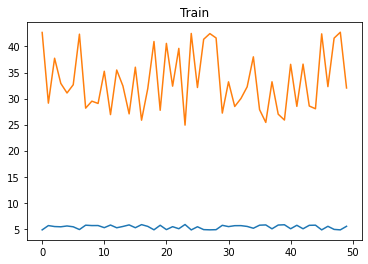

2/2 [==============================] - 0s 6ms/step


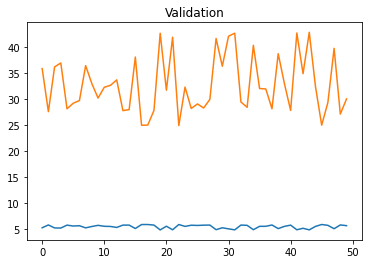

3/3 [==============================] - 0s 3ms/step


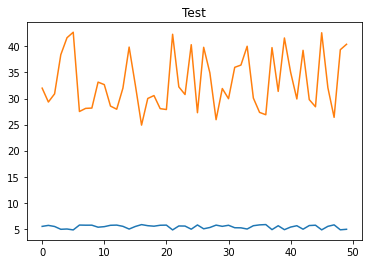

3/3 [==============================] - 0s 5ms/step


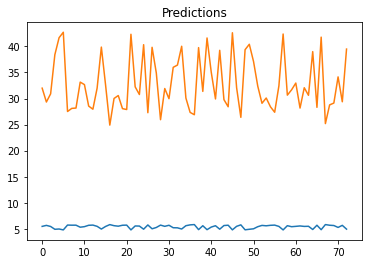

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 8s - loss: 1432.0244 - root_mean_squared_error: 37.8421

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 279ms/step - loss: 1466.2505 - root_mean_squared_error: 38.2916 - val_loss: 1516.3438 - val_root_mean_squared_error: 38.9403
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1324.6260 - root_mean_squared_error: 36.3954

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 219ms/step - loss: 1397.0089 - root_mean_squared_error: 37.3766 - val_loss: 1442.8446 - val_root_mean_squared_error: 37.9848
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 1408.7340 - root_mean_squared_error: 37.5331

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 1329.4316 - root_mean_squared_error: 36.4614 - val_loss: 1371.3448 - val_root_mean_squared_error: 37.0317
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 1258.3152 - root_mean_squared_error: 35.4727

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 287ms/step - loss: 1263.5385 - root_mean_squared_error: 35.5463 - val_loss: 1301.9343 - val_root_mean_squared_error: 36.0823
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 1191.1639 - root_mean_squared_error: 34.5132

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 200ms/step - loss: 1199.9543 - root_mean_squared_error: 34.6404 - val_loss: 1234.8241 - val_root_mean_squared_error: 35.1401
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 1235.0413 - root_mean_squared_error: 35.1432

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 400ms/step - loss: 1138.7312 - root_mean_squared_error: 33.7451 - val_loss: 1169.4462 - val_root_mean_squared_error: 34.1972
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 1091.0909 - root_mean_squared_error: 33.0317

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 324ms/step - loss: 1078.9561 - root_mean_squared_error: 32.8475 - val_loss: 1106.2435 - val_root_mean_squared_error: 33.2602
Epoch 8/30
4/8 [==============>...............] - ETA: 0s - loss: 1025.7284 - root_mean_squared_error: 32.0270

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 1021.0030 - root_mean_squared_error: 31.9531 - val_loss: 1045.2854 - val_root_mean_squared_error: 32.3309
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 964.1156 - root_mean_squared_error: 31.0502

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 965.5151 - root_mean_squared_error: 31.0727 - val_loss: 986.7004 - val_root_mean_squared_error: 31.4118
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 916.1406 - root_mean_squared_error: 30.2678

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 201ms/step - loss: 912.0020 - root_mean_squared_error: 30.1994 - val_loss: 930.0308 - val_root_mean_squared_error: 30.4964
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 860.3338 - root_mean_squared_error: 29.3314

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 218ms/step - loss: 860.3338 - root_mean_squared_error: 29.3314 - val_loss: 875.7323 - val_root_mean_squared_error: 29.5928
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 836.1353 - root_mean_squared_error: 28.9160

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 200ms/step - loss: 810.8311 - root_mean_squared_error: 28.4751 - val_loss: 823.4344 - val_root_mean_squared_error: 28.6955
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 728.8793 - root_mean_squared_error: 26.9978

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 207ms/step - loss: 762.7496 - root_mean_squared_error: 27.6179 - val_loss: 773.3098 - val_root_mean_squared_error: 27.8084
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 686.7582 - root_mean_squared_error: 26.2061

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 294ms/step - loss: 716.8391 - root_mean_squared_error: 26.7739 - val_loss: 724.9584 - val_root_mean_squared_error: 26.9251
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 711.8406 - root_mean_squared_error: 26.6803

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 672.5050 - root_mean_squared_error: 25.9327 - val_loss: 677.8456 - val_root_mean_squared_error: 26.0355
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 666.3949 - root_mean_squared_error: 25.8146

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 629.5790 - root_mean_squared_error: 25.0914 - val_loss: 632.5141 - val_root_mean_squared_error: 25.1498
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 618.1755 - root_mean_squared_error: 24.8631

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 271ms/step - loss: 588.2444 - root_mean_squared_error: 24.2538 - val_loss: 588.9930 - val_root_mean_squared_error: 24.2692
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 564.0450 - root_mean_squared_error: 23.7496

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 244ms/step - loss: 548.5919 - root_mean_squared_error: 23.4220 - val_loss: 547.6744 - val_root_mean_squared_error: 23.4024
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 540.4405 - root_mean_squared_error: 23.2474

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 255ms/step - loss: 511.2350 - root_mean_squared_error: 22.6105 - val_loss: 510.5681 - val_root_mean_squared_error: 22.5958
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 445.6060 - root_mean_squared_error: 21.1094

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 484.5078 - root_mean_squared_error: 22.0115 - val_loss: 491.7170 - val_root_mean_squared_error: 22.1747
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 512.9750 - root_mean_squared_error: 22.6490

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 466.7462 - root_mean_squared_error: 21.6043 - val_loss: 471.9294 - val_root_mean_squared_error: 21.7239
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 488.6647 - root_mean_squared_error: 22.1058

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 215ms/step - loss: 448.3772 - root_mean_squared_error: 21.1749 - val_loss: 452.2370 - val_root_mean_squared_error: 21.2659
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 452.9181 - root_mean_squared_error: 21.2819

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 430.1412 - root_mean_squared_error: 20.7398 - val_loss: 432.8077 - val_root_mean_squared_error: 20.8040
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 415.6253 - root_mean_squared_error: 20.3869

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 412.1754 - root_mean_squared_error: 20.3021 - val_loss: 413.7397 - val_root_mean_squared_error: 20.3406
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 377.6876 - root_mean_squared_error: 19.4342

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 265ms/step - loss: 394.7280 - root_mean_squared_error: 19.8678 - val_loss: 394.9485 - val_root_mean_squared_error: 19.8733
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 414.1948 - root_mean_squared_error: 20.3518

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 377.3869 - root_mean_squared_error: 19.4264 - val_loss: 376.6776 - val_root_mean_squared_error: 19.4082
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 390.2107 - root_mean_squared_error: 19.7538

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 360.5379 - root_mean_squared_error: 18.9878 - val_loss: 358.6827 - val_root_mean_squared_error: 18.9389
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 331.8184 - root_mean_squared_error: 18.2159

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 285ms/step - loss: 343.8520 - root_mean_squared_error: 18.5432 - val_loss: 341.1457 - val_root_mean_squared_error: 18.4701
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 321.1184 - root_mean_squared_error: 17.9198

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 220ms/step - loss: 327.7979 - root_mean_squared_error: 18.1052 - val_loss: 324.1115 - val_root_mean_squared_error: 18.0031
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 305.2982 - root_mean_squared_error: 17.4728

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 3ms/step


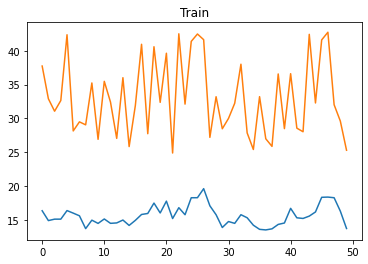

2/2 [==============================] - 0s 5ms/step


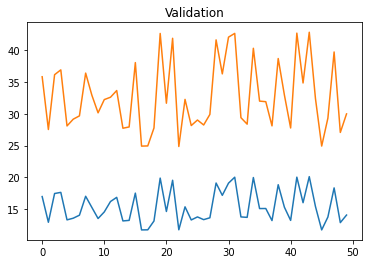

3/3 [==============================] - 0s 3ms/step


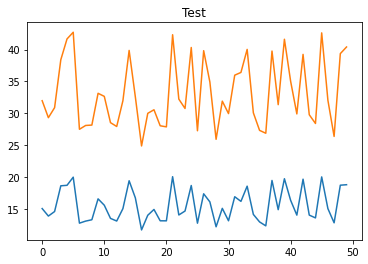

3/3 [==============================] - 0s 3ms/step


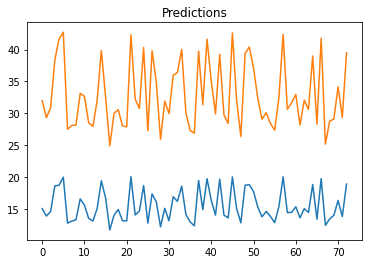

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1091.5485 - root_mean_squared_error: 33.0386 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 1093.0740 - root_mean_squared_error: 33.0617 - val_loss: 1153.7981 - val_root_mean_squared_error: 33.9676
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 1098.1300 - root_mean_squared_error: 33.1380

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1086.7094 - root_mean_squared_error: 32.9653 - val_loss: 1147.2427 - val_root_mean_squared_error: 33.8710
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 1089.3804 - root_mean_squared_error: 33.0058

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 1080.2856 - root_mean_squared_error: 32.8677 - val_loss: 1140.6304 - val_root_mean_squared_error: 33.7732
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 1072.3834 - root_mean_squared_error: 32.7473

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1073.7831 - root_mean_squared_error: 32.7686 - val_loss: 1133.9026 - val_root_mean_squared_error: 33.6735
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 1051.3694 - root_mean_squared_error: 32.4248

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1067.1588 - root_mean_squared_error: 32.6674 - val_loss: 1127.0997 - val_root_mean_squared_error: 33.5723
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 1064.4823 - root_mean_squared_error: 32.6264

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1060.4899 - root_mean_squared_error: 32.5652 - val_loss: 1120.1879 - val_root_mean_squared_error: 33.4692
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 1067.6940 - root_mean_squared_error: 32.6756

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1053.7119 - root_mean_squared_error: 32.4609 - val_loss: 1113.1798 - val_root_mean_squared_error: 33.3643
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 1050.8440 - root_mean_squared_error: 32.4167

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 1046.8147 - root_mean_squared_error: 32.3545 - val_loss: 1106.1072 - val_root_mean_squared_error: 33.2582
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 1039.8560 - root_mean_squared_error: 32.2468

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1039.8560 - root_mean_squared_error: 32.2468 - val_loss: 1098.9541 - val_root_mean_squared_error: 33.1505
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 1032.3695 - root_mean_squared_error: 32.1305

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1032.7759 - root_mean_squared_error: 32.1368 - val_loss: 1091.6454 - val_root_mean_squared_error: 33.0401
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 1025.5298 - root_mean_squared_error: 32.0239

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 1025.5298 - root_mean_squared_error: 32.0239 - val_loss: 1084.2202 - val_root_mean_squared_error: 32.9275
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 1072.8984 - root_mean_squared_error: 32.7551

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 996ms/step - loss: 1018.2081 - root_mean_squared_error: 31.9094 - val_loss: 1076.6085 - val_root_mean_squared_error: 32.8117
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 1010.6398 - root_mean_squared_error: 31.7906

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 1010.6398 - root_mean_squared_error: 31.7906 - val_loss: 1068.9031 - val_root_mean_squared_error: 32.6941
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 884.3476 - root_mean_squared_error: 29.7380

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1002.9700 - root_mean_squared_error: 31.6697 - val_loss: 1060.9453 - val_root_mean_squared_error: 32.5722
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 986.8120 - root_mean_squared_error: 31.4136 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 995.0275 - root_mean_squared_error: 31.5441 - val_loss: 1052.7751 - val_root_mean_squared_error: 32.4465
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 986.8806 - root_mean_squared_error: 31.4147 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 986.8806 - root_mean_squared_error: 31.4147 - val_loss: 1044.3402 - val_root_mean_squared_error: 32.3163
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 942.9619 - root_mean_squared_error: 30.7077

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 978.3836 - root_mean_squared_error: 31.2791 - val_loss: 1035.6707 - val_root_mean_squared_error: 32.1818
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 910.3071 - root_mean_squared_error: 30.1713

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 969.6297 - root_mean_squared_error: 31.1389 - val_loss: 1026.6812 - val_root_mean_squared_error: 32.0419
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 1035.8578 - root_mean_squared_error: 32.1847

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 960.5708 - root_mean_squared_error: 30.9931 - val_loss: 1017.2711 - val_root_mean_squared_error: 31.8947
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 978.5366 - root_mean_squared_error: 31.2816

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 7s 982ms/step - loss: 951.0148 - root_mean_squared_error: 30.8385 - val_loss: 1007.4429 - val_root_mean_squared_error: 31.7402
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 941.0434 - root_mean_squared_error: 30.6764

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 941.0434 - root_mean_squared_error: 30.6764 - val_loss: 997.2105 - val_root_mean_squared_error: 31.5786
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 892.8164 - root_mean_squared_error: 29.8800

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 930.6796 - root_mean_squared_error: 30.5070 - val_loss: 986.5450 - val_root_mean_squared_error: 31.4093
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 1024.5015 - root_mean_squared_error: 32.0078

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 919.8516 - root_mean_squared_error: 30.3291 - val_loss: 975.4109 - val_root_mean_squared_error: 31.2316
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 916.3718 - root_mean_squared_error: 30.2716

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 908.6654 - root_mean_squared_error: 30.1441 - val_loss: 963.9545 - val_root_mean_squared_error: 31.0476
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 834.5332 - root_mean_squared_error: 28.8883

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 897.1127 - root_mean_squared_error: 29.9518 - val_loss: 952.2236 - val_root_mean_squared_error: 30.8581
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 863.6267 - root_mean_squared_error: 29.3875

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 885.3861 - root_mean_squared_error: 29.7554 - val_loss: 940.1503 - val_root_mean_squared_error: 30.6619
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 889.7764 - root_mean_squared_error: 29.8291

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 873.3599 - root_mean_squared_error: 29.5527 - val_loss: 927.8984 - val_root_mean_squared_error: 30.4614
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 865.9004 - root_mean_squared_error: 29.4262

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 861.2241 - root_mean_squared_error: 29.3466 - val_loss: 915.5964 - val_root_mean_squared_error: 30.2588
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 803.0454 - root_mean_squared_error: 28.3381

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 849.1210 - root_mean_squared_error: 29.1397 - val_loss: 903.3925 - val_root_mean_squared_error: 30.0565
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 832.1682 - root_mean_squared_error: 28.8473

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 1s 4ms/step


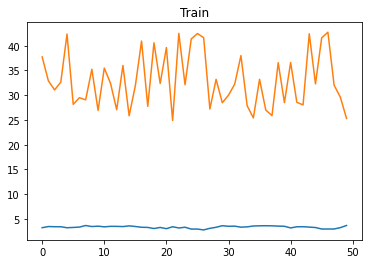

2/2 [==============================] - 1s 8ms/step


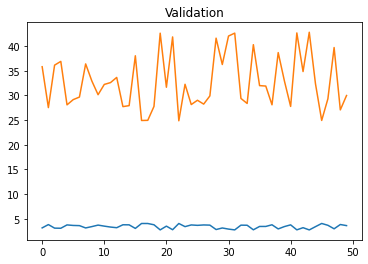

3/3 [==============================] - 0s 5ms/step


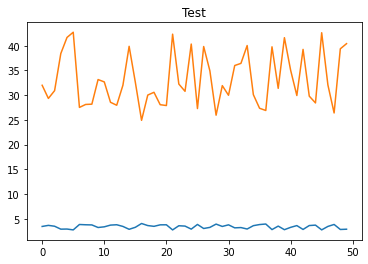

3/3 [==============================] - 0s 3ms/step


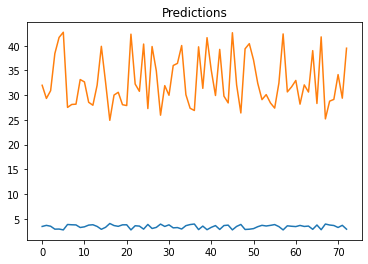

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1078.5872 - root_mean_squared_error: 32.8419 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 1s/step - loss: 1080.7235 - root_mean_squared_error: 32.8744 - val_loss: 1140.8875 - val_root_mean_squared_error: 33.7770
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1086.1252 - root_mean_squared_error: 32.9564

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1075.3168 - root_mean_squared_error: 32.7920 - val_loss: 1135.3943 - val_root_mean_squared_error: 33.6956
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1069.9198 - root_mean_squared_error: 32.7096

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1069.9198 - root_mean_squared_error: 32.7096 - val_loss: 1129.8916 - val_root_mean_squared_error: 33.6139
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 1060.0045 - root_mean_squared_error: 32.5577

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1064.5013 - root_mean_squared_error: 32.6267 - val_loss: 1124.3911 - val_root_mean_squared_error: 33.5319
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 1059.0598 - root_mean_squared_error: 32.5432

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1059.0598 - root_mean_squared_error: 32.5432 - val_loss: 1118.8296 - val_root_mean_squared_error: 33.4489
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 1067.0699 - root_mean_squared_error: 32.6660

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1053.5699 - root_mean_squared_error: 32.4587 - val_loss: 1113.1848 - val_root_mean_squared_error: 33.3644
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 1096.6641 - root_mean_squared_error: 33.1159

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1047.9882 - root_mean_squared_error: 32.3726 - val_loss: 1107.5065 - val_root_mean_squared_error: 33.2792
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 1046.3885 - root_mean_squared_error: 32.3479

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1042.3774 - root_mean_squared_error: 32.2859 - val_loss: 1101.7314 - val_root_mean_squared_error: 33.1923
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 1036.7480 - root_mean_squared_error: 32.1986

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1036.6636 - root_mean_squared_error: 32.1973 - val_loss: 1095.8798 - val_root_mean_squared_error: 33.1041
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 1045.8608 - root_mean_squared_error: 32.3398

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1030.8812 - root_mean_squared_error: 32.1073 - val_loss: 1089.9044 - val_root_mean_squared_error: 33.0137
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 1019.2999 - root_mean_squared_error: 31.9265

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1025.0040 - root_mean_squared_error: 32.0157 - val_loss: 1083.8250 - val_root_mean_squared_error: 32.9215
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 1015.3763 - root_mean_squared_error: 31.8650

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1018.9686 - root_mean_squared_error: 31.9213 - val_loss: 1077.5409 - val_root_mean_squared_error: 32.8259
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 1010.8390 - root_mean_squared_error: 31.7937

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1011.7661 - root_mean_squared_error: 31.8083 - val_loss: 1068.6511 - val_root_mean_squared_error: 32.6902
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 1007.7630 - root_mean_squared_error: 31.7453

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1003.2014 - root_mean_squared_error: 31.6734 - val_loss: 1059.5934 - val_root_mean_squared_error: 32.5514
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 1056.7080 - root_mean_squared_error: 32.5070

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 994.8923 - root_mean_squared_error: 31.5419 - val_loss: 1051.0330 - val_root_mean_squared_error: 32.4196
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 977.0087 - root_mean_squared_error: 31.2571 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 986.8005 - root_mean_squared_error: 31.4134 - val_loss: 1042.8818 - val_root_mean_squared_error: 32.2937
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 978.9632 - root_mean_squared_error: 31.2884

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 978.9632 - root_mean_squared_error: 31.2884 - val_loss: 1034.9792 - val_root_mean_squared_error: 32.1711
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 969.5394 - root_mean_squared_error: 31.1374 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 971.3147 - root_mean_squared_error: 31.1659 - val_loss: 1027.2539 - val_root_mean_squared_error: 32.0508
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 959.7099 - root_mean_squared_error: 30.9792

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 963.7797 - root_mean_squared_error: 31.0448 - val_loss: 1019.6517 - val_root_mean_squared_error: 31.9320
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 956.4009 - root_mean_squared_error: 30.9257

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 956.4009 - root_mean_squared_error: 30.9257 - val_loss: 1012.0875 - val_root_mean_squared_error: 31.8133
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 1003.6078 - root_mean_squared_error: 31.6798

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 949.0012 - root_mean_squared_error: 30.8059 - val_loss: 1004.6194 - val_root_mean_squared_error: 31.6957
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 981.7213 - root_mean_squared_error: 31.3324

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 941.6441 - root_mean_squared_error: 30.6862 - val_loss: 997.0893 - val_root_mean_squared_error: 31.5767
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 989.4803 - root_mean_squared_error: 31.4560

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 934.2464 - root_mean_squared_error: 30.5654 - val_loss: 989.4520 - val_root_mean_squared_error: 31.4556
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 900.4885 - root_mean_squared_error: 30.0081

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 926.6771 - root_mean_squared_error: 30.4414 - val_loss: 981.9250 - val_root_mean_squared_error: 31.3357
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 837.8024 - root_mean_squared_error: 28.9448

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 919.2310 - root_mean_squared_error: 30.3188 - val_loss: 974.9282 - val_root_mean_squared_error: 31.2238
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 1028.0913 - root_mean_squared_error: 32.0639

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 912.6185 - root_mean_squared_error: 30.2096 - val_loss: 968.3640 - val_root_mean_squared_error: 31.1185
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 900.9692 - root_mean_squared_error: 30.0161

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 906.4286 - root_mean_squared_error: 30.1070 - val_loss: 961.9485 - val_root_mean_squared_error: 31.0153
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 903.1326 - root_mean_squared_error: 30.0522

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 900.2603 - root_mean_squared_error: 30.0043 - val_loss: 955.5451 - val_root_mean_squared_error: 30.9119
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 894.7837 - root_mean_squared_error: 29.9129

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 893.9866 - root_mean_squared_error: 29.8996 - val_loss: 949.0916 - val_root_mean_squared_error: 30.8073
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 887.6115 - root_mean_squared_error: 29.7928

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 1s 10ms/step


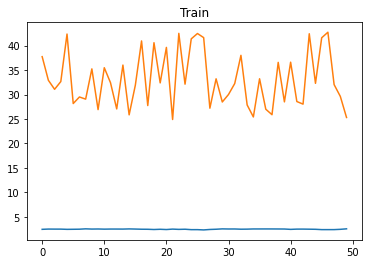

2/2 [==============================] - 1s 11ms/step


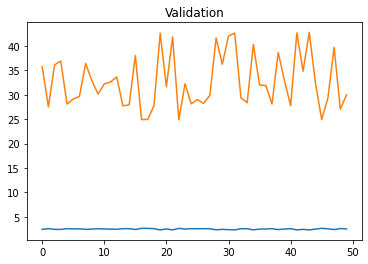

3/3 [==============================] - 0s 4ms/step


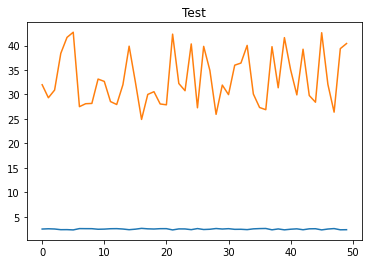

3/3 [==============================] - 0s 4ms/step


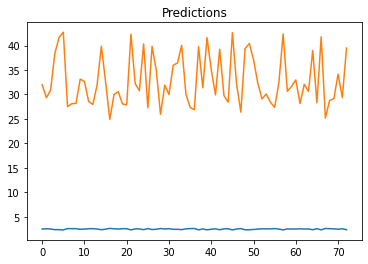

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
1/8 [==>...........................] - ETA: 14s - loss: 984.5651 - root_mean_squared_error: 31.3778INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 586ms/step - loss: 992.5436 - root_mean_squared_error: 31.5047 - val_loss: 1049.4541 - val_root_mean_squared_error: 32.3953
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 970.8777 - root_mean_squared_error: 31.1589INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 983.5548 - root_mean_squared_error: 31.3617 - val_loss: 1040.3700 - val_root_mean_squared_error: 32.2548
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 883.6919 - root_mean_squared_error: 29.7270INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 804ms/step - loss: 974.5478 - root_mean_squared_error: 31.2177 - val_loss: 1031.1899 - val_root_mean_squared_error: 32.1121
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 960.5687 - root_mean_squared_error: 30.9930INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 642ms/step - loss: 965.5037 - root_mean_squared_error: 31.0726 - val_loss: 1021.9594 - val_root_mean_squared_error: 31.9681
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 999.4403 - root_mean_squared_error: 31.6139INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 956.4808 - root_mean_squared_error: 30.9270 - val_loss: 1012.7043 - val_root_mean_squared_error: 31.8230
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 997.7816 - root_mean_squared_error: 31.5877INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 947.4403 - root_mean_squared_error: 30.7805 - val_loss: 1003.5490 - val_root_mean_squared_error: 31.6788
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 939.7083 - root_mean_squared_error: 30.6547 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 938.6570 - root_mean_squared_error: 30.6375 - val_loss: 994.5358 - val_root_mean_squared_error: 31.5363
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 999.0199 - root_mean_squared_error: 31.6073INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 929.9857 - root_mean_squared_error: 30.4957 - val_loss: 985.7843 - val_root_mean_squared_error: 31.3972
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 918.0273 - root_mean_squared_error: 30.2990INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 921.6049 - root_mean_squared_error: 30.3579 - val_loss: 977.2519 - val_root_mean_squared_error: 31.2610
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 956.0460 - root_mean_squared_error: 30.9200INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 913.4780 - root_mean_squared_error: 30.2238 - val_loss: 968.9512 - val_root_mean_squared_error: 31.1280
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 919.9728 - root_mean_squared_error: 30.3311INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 905.6553 - root_mean_squared_error: 30.0941 - val_loss: 960.9158 - val_root_mean_squared_error: 30.9986
Epoch 12/30
3/8 [==========>...................] - ETA: 0s - loss: 934.0891 - root_mean_squared_error: 30.5629INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 555ms/step - loss: 898.0282 - root_mean_squared_error: 29.9671 - val_loss: 953.1596 - val_root_mean_squared_error: 30.8733
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 907.5544 - root_mean_squared_error: 30.1256INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 890.6882 - root_mean_squared_error: 29.8444 - val_loss: 945.6151 - val_root_mean_squared_error: 30.7509
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 936.4838 - root_mean_squared_error: 30.6020INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 883.4904 - root_mean_squared_error: 29.7236 - val_loss: 938.2232 - val_root_mean_squared_error: 30.6304
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 876.3892 - root_mean_squared_error: 29.6039INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 876.3892 - root_mean_squared_error: 29.6039 - val_loss: 930.8690 - val_root_mean_squared_error: 30.5101
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 906.7258 - root_mean_squared_error: 30.1119INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 530ms/step - loss: 869.2986 - root_mean_squared_error: 29.4839 - val_loss: 923.4224 - val_root_mean_squared_error: 30.3879
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 714.1779 - root_mean_squared_error: 26.7241INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 601ms/step - loss: 862.0198 - root_mean_squared_error: 29.3602 - val_loss: 915.9017 - val_root_mean_squared_error: 30.2639
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 879.1128 - root_mean_squared_error: 29.6498INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 854.6106 - root_mean_squared_error: 29.2337 - val_loss: 908.0665 - val_root_mean_squared_error: 30.1341
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 840.7184 - root_mean_squared_error: 28.9951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 846.7421 - root_mean_squared_error: 29.0988 - val_loss: 899.8002 - val_root_mean_squared_error: 29.9967
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 838.4994 - root_mean_squared_error: 28.9569INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 838.2965 - root_mean_squared_error: 28.9534 - val_loss: 890.9596 - val_root_mean_squared_error: 29.8489
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 800.4764 - root_mean_squared_error: 28.2927INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 561ms/step - loss: 829.1751 - root_mean_squared_error: 28.7954 - val_loss: 881.4529 - val_root_mean_squared_error: 29.6893
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 853.9351 - root_mean_squared_error: 29.2222INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 819.2717 - root_mean_squared_error: 28.6229 - val_loss: 871.2601 - val_root_mean_squared_error: 29.5171
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 853.4537 - root_mean_squared_error: 29.2139INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 553ms/step - loss: 808.6064 - root_mean_squared_error: 28.4360 - val_loss: 860.2610 - val_root_mean_squared_error: 29.3302
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 851.2087 - root_mean_squared_error: 29.1755INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 797.2061 - root_mean_squared_error: 28.2348 - val_loss: 848.4839 - val_root_mean_squared_error: 29.1287
Epoch 25/30
4/8 [==============>...............] - ETA: 0s - loss: 782.9586 - root_mean_squared_error: 27.9814INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 784.9954 - root_mean_squared_error: 28.0178 - val_loss: 836.0714 - val_root_mean_squared_error: 28.9149
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 772.1517 - root_mean_squared_error: 27.7876INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 524ms/step - loss: 772.1517 - root_mean_squared_error: 27.7876 - val_loss: 822.9055 - val_root_mean_squared_error: 28.6863
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 758.3528 - root_mean_squared_error: 27.5382INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 758.3528 - root_mean_squared_error: 27.5382 - val_loss: 809.3326 - val_root_mean_squared_error: 28.4488
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 794.3218 - root_mean_squared_error: 28.1837INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 744.2133 - root_mean_squared_error: 27.2803 - val_loss: 795.6545 - val_root_mean_squared_error: 28.2073
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 761.1970 - root_mean_squared_error: 27.5898INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 730.2220 - root_mean_squared_error: 27.0226 - val_loss: 782.2064 - val_root_mean_squared_error: 27.9680
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 718.2545 - root_mean_squared_error: 26.8003INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 0s 3ms/step


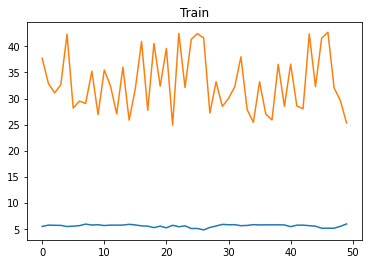

2/2 [==============================] - 1s 3ms/step


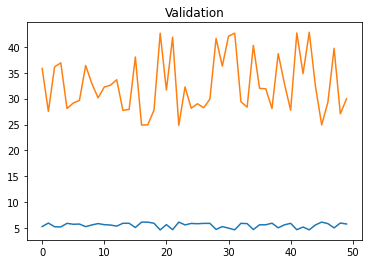

3/3 [==============================] - 0s 3ms/step


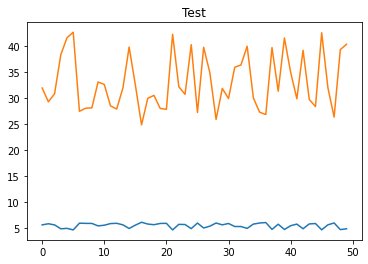

3/3 [==============================] - 0s 3ms/step


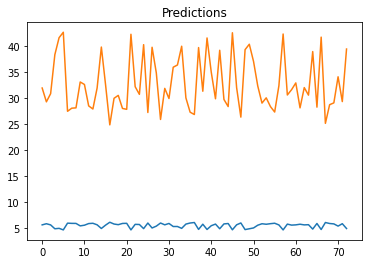

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 668.2382 - root_mean_squared_error: 25.8503 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 561ms/step - loss: 668.2382 - root_mean_squared_error: 25.8503 - val_loss: 499.6613 - val_root_mean_squared_error: 22.3531
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 533.5585 - root_mean_squared_error: 23.0989

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 379ms/step - loss: 525.4924 - root_mean_squared_error: 22.9236 - val_loss: 401.1280 - val_root_mean_squared_error: 20.0282
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 513.6478 - root_mean_squared_error: 22.6638

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 445.2808 - root_mean_squared_error: 21.1017 - val_loss: 326.1588 - val_root_mean_squared_error: 18.0599
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 339.8396 - root_mean_squared_error: 18.4347

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 361ms/step - loss: 339.7499 - root_mean_squared_error: 18.4323 - val_loss: 259.4859 - val_root_mean_squared_error: 16.1086
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 285.3205 - root_mean_squared_error: 16.8914

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 453ms/step - loss: 285.3205 - root_mean_squared_error: 16.8914 - val_loss: 200.8051 - val_root_mean_squared_error: 14.1706
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 227.0573 - root_mean_squared_error: 15.0684

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 531ms/step - loss: 206.9330 - root_mean_squared_error: 14.3852 - val_loss: 150.7443 - val_root_mean_squared_error: 12.2778
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 165.7265 - root_mean_squared_error: 12.8735

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 407ms/step - loss: 165.7265 - root_mean_squared_error: 12.8735 - val_loss: 109.9481 - val_root_mean_squared_error: 10.4856
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 139.2442 - root_mean_squared_error: 11.8002

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 385ms/step - loss: 132.2897 - root_mean_squared_error: 11.5017 - val_loss: 77.7055 - val_root_mean_squared_error: 8.8151
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 97.6628 - root_mean_squared_error: 9.8825  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 466ms/step - loss: 96.1050 - root_mean_squared_error: 9.8033 - val_loss: 52.8745 - val_root_mean_squared_error: 7.2715
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 72.7680 - root_mean_squared_error: 8.5304

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 72.9247 - root_mean_squared_error: 8.5396 - val_loss: 34.4151 - val_root_mean_squared_error: 5.8664
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 66.8220 - root_mean_squared_error: 8.1745

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 342ms/step - loss: 52.3398 - root_mean_squared_error: 7.2346 - val_loss: 21.4627 - val_root_mean_squared_error: 4.6328
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 47.8634 - root_mean_squared_error: 6.9183

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 45.9684 - root_mean_squared_error: 6.7800 - val_loss: 13.1386 - val_root_mean_squared_error: 3.6247
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 37.7428 - root_mean_squared_error: 6.1435

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 389ms/step - loss: 35.6243 - root_mean_squared_error: 5.9686 - val_loss: 7.5547 - val_root_mean_squared_error: 2.7486
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 37.8975 - root_mean_squared_error: 6.1561

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 305ms/step - loss: 35.1261 - root_mean_squared_error: 5.9267 - val_loss: 4.1951 - val_root_mean_squared_error: 2.0482
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 36.8898 - root_mean_squared_error: 6.0737

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 30.3406 - root_mean_squared_error: 5.5082 - val_loss: 2.2711 - val_root_mean_squared_error: 1.5070
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 25.8953 - root_mean_squared_error: 5.0887

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 25.8953 - root_mean_squared_error: 5.0887 - val_loss: 1.3528 - val_root_mean_squared_error: 1.1631
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 18.8044 - root_mean_squared_error: 4.3364

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 416ms/step - loss: 25.5374 - root_mean_squared_error: 5.0535 - val_loss: 0.9540 - val_root_mean_squared_error: 0.9767
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 36.9239 - root_mean_squared_error: 6.0765

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 28.0181 - root_mean_squared_error: 5.2932 - val_loss: 0.8153 - val_root_mean_squared_error: 0.9029
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 31.8085 - root_mean_squared_error: 5.6399

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 375ms/step - loss: 28.7864 - root_mean_squared_error: 5.3653 - val_loss: 0.7735 - val_root_mean_squared_error: 0.8795
Epoch 20/30
8/8 [==============================] - 0s 14ms/step - loss: 22.3454 - root_mean_squared_error: 4.7271 - val_loss: 0.7792 - val_root_mean_squared_error: 0.8827
Epoch 21/30
8/8 [==============================] - 0s 28ms/step - loss: 23.9943 - root_mean_squared_error: 4.8984 - val_loss: 0.7835 - val_root_mean_squared_error: 0.8852
Epoch 22/30
8/8 [==============================] - 0s 30ms/step - loss: 24.8892 - root_mean_squared_error: 4.9889 - val_loss: 0.7884 - val_root_mean_squared_error: 0.8879
Epoch 23/30
8/8 [==============================] - 0s 21ms/step - loss: 26.1482 - root_mean_squared_error: 5.1135 - val_loss: 0.7748 - val_root_mean_squared_error: 0.8802
Epoch 24/30
8/8 [==============================] - 0s 24ms/step - loss: 19.9978 - root_mean_squared_error: 4.4719 - val_loss: 0.7763 - val_root_mean_squared

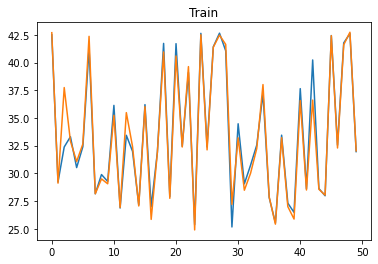

2/2 [==============================] - 0s 5ms/step


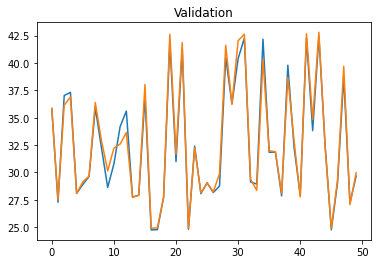

3/3 [==============================] - 0s 3ms/step


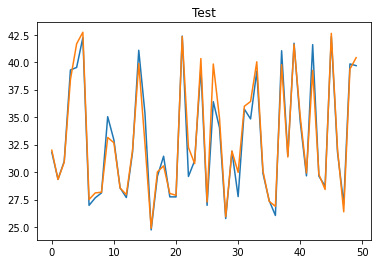

3/3 [==============================] - 0s 3ms/step


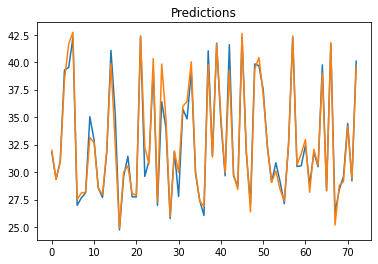

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

0.8797911923328622

### GRU

Epoch 1/30
1/8 [==>...........................] - ETA: 29s - loss: 1008.5167 - root_mean_squared_error: 31.7572

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 1s/step - loss: 969.3942 - root_mean_squared_error: 31.1351 - val_loss: 1020.7351 - val_root_mean_squared_error: 31.9489
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 951.3784 - root_mean_squared_error: 30.8444

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 935ms/step - loss: 962.9161 - root_mean_squared_error: 31.0309 - val_loss: 1011.7783 - val_root_mean_squared_error: 31.8085
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 950.0049 - root_mean_squared_error: 30.8221

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 6s 923ms/step - loss: 952.7679 - root_mean_squared_error: 30.8669 - val_loss: 1002.8902 - val_root_mean_squared_error: 31.6684
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 941.1058 - root_mean_squared_error: 30.6774

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 944.8020 - root_mean_squared_error: 30.7376 - val_loss: 994.0946 - val_root_mean_squared_error: 31.5293
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 934.5521 - root_mean_squared_error: 30.5704 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 6s 888ms/step - loss: 934.5521 - root_mean_squared_error: 30.5704 - val_loss: 985.3127 - val_root_mean_squared_error: 31.3897
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 923.8601 - root_mean_squared_error: 30.3951

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 923.8601 - root_mean_squared_error: 30.3951 - val_loss: 976.5458 - val_root_mean_squared_error: 31.2497
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 870.5632 - root_mean_squared_error: 29.5053

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 914.3110 - root_mean_squared_error: 30.2376 - val_loss: 967.8164 - val_root_mean_squared_error: 31.1097
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 911.3488 - root_mean_squared_error: 30.1886

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 7s 980ms/step - loss: 907.1188 - root_mean_squared_error: 30.1184 - val_loss: 959.1321 - val_root_mean_squared_error: 30.9699
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 900.0901 - root_mean_squared_error: 30.0015

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 6s 871ms/step - loss: 900.0901 - root_mean_squared_error: 30.0015 - val_loss: 950.4058 - val_root_mean_squared_error: 30.8287
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 887.3498 - root_mean_squared_error: 29.7884

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 892.2794 - root_mean_squared_error: 29.8710 - val_loss: 941.6415 - val_root_mean_squared_error: 30.6862
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 874.8470 - root_mean_squared_error: 29.5778

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 883.8281 - root_mean_squared_error: 29.7292 - val_loss: 932.8276 - val_root_mean_squared_error: 30.5422
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 873.5260 - root_mean_squared_error: 29.5555

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 873.5260 - root_mean_squared_error: 29.5555 - val_loss: 924.0352 - val_root_mean_squared_error: 30.3979
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 868.6080 - root_mean_squared_error: 29.4722

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 865.3354 - root_mean_squared_error: 29.4166 - val_loss: 915.2321 - val_root_mean_squared_error: 30.2528
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 828.7849 - root_mean_squared_error: 28.7886

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 857.4379 - root_mean_squared_error: 29.2820 - val_loss: 906.4318 - val_root_mean_squared_error: 30.1070
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 918.5984 - root_mean_squared_error: 30.3084

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 850.6945 - root_mean_squared_error: 29.1667 - val_loss: 897.5706 - val_root_mean_squared_error: 29.9595
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 839.7283 - root_mean_squared_error: 28.9781

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 840.2085 - root_mean_squared_error: 28.9864 - val_loss: 888.6841 - val_root_mean_squared_error: 29.8108
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 829.1021 - root_mean_squared_error: 28.7941

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 832.7733 - root_mean_squared_error: 28.8578 - val_loss: 879.7589 - val_root_mean_squared_error: 29.6607
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 817.5063 - root_mean_squared_error: 28.5921

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 823.2835 - root_mean_squared_error: 28.6929 - val_loss: 870.8448 - val_root_mean_squared_error: 29.5101
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 812.9498 - root_mean_squared_error: 28.5123

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 815.4532 - root_mean_squared_error: 28.5561 - val_loss: 861.8209 - val_root_mean_squared_error: 29.3568
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 846.5221 - root_mean_squared_error: 29.0951

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 806.0070 - root_mean_squared_error: 28.3903 - val_loss: 852.7310 - val_root_mean_squared_error: 29.2016
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 889.4167 - root_mean_squared_error: 29.8231

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 796.6597 - root_mean_squared_error: 28.2252 - val_loss: 843.5560 - val_root_mean_squared_error: 29.0440
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 833.5325 - root_mean_squared_error: 28.8710

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 789.9996 - root_mean_squared_error: 28.1069 - val_loss: 834.3516 - val_root_mean_squared_error: 28.8851
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 787.2675 - root_mean_squared_error: 28.0583

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 780.4484 - root_mean_squared_error: 27.9365 - val_loss: 825.1028 - val_root_mean_squared_error: 28.7246
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 735.8059 - root_mean_squared_error: 27.1257

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 768.3846 - root_mean_squared_error: 27.7198 - val_loss: 815.7654 - val_root_mean_squared_error: 28.5616
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 766.8068 - root_mean_squared_error: 27.6913

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 761.8490 - root_mean_squared_error: 27.6016 - val_loss: 806.3608 - val_root_mean_squared_error: 28.3965
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 754.4658 - root_mean_squared_error: 27.4675

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 754.4658 - root_mean_squared_error: 27.4675 - val_loss: 797.0000 - val_root_mean_squared_error: 28.2312
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 737.9393 - root_mean_squared_error: 27.1650

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 742.3669 - root_mean_squared_error: 27.2464 - val_loss: 787.6506 - val_root_mean_squared_error: 28.0651
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 732.2288 - root_mean_squared_error: 27.0597

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 735.3881 - root_mean_squared_error: 27.1180 - val_loss: 778.2795 - val_root_mean_squared_error: 27.8977
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 723.1689 - root_mean_squared_error: 26.8918

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 723.1689 - root_mean_squared_error: 26.8918 - val_loss: 768.9790 - val_root_mean_squared_error: 27.7305
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 722.5325 - root_mean_squared_error: 26.8800

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 14ms/step


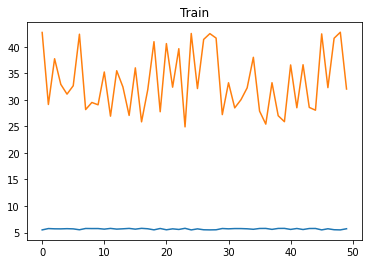

2/2 [==============================] - 2s 10ms/step


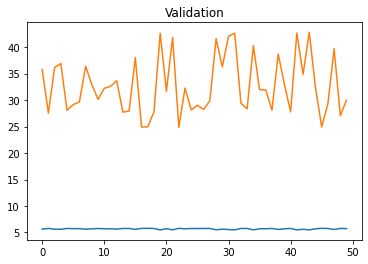

3/3 [==============================] - 0s 42ms/step


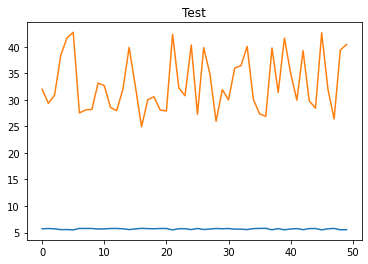

3/3 [==============================] - 0s 9ms/step


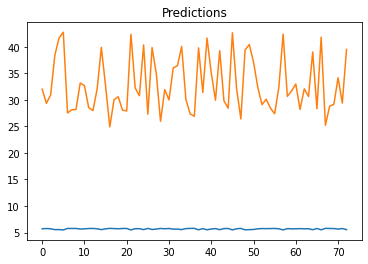

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

763.8558647686211

### LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1081.3861 - root_mean_squared_error: 32.8844 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 2s/step - loss: 1081.3861 - root_mean_squared_error: 32.8844 - val_loss: 1131.2603 - val_root_mean_squared_error: 33.6342
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 1076.7003 - root_mean_squared_error: 32.8131

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1077.8219 - root_mean_squared_error: 32.8302 - val_loss: 1127.0815 - val_root_mean_squared_error: 33.5720
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 1072.8741 - root_mean_squared_error: 32.7548

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1072.9460 - root_mean_squared_error: 32.7559 - val_loss: 1122.9677 - val_root_mean_squared_error: 33.5107
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 1073.0642 - root_mean_squared_error: 32.7577

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1071.4290 - root_mean_squared_error: 32.7327 - val_loss: 1118.9283 - val_root_mean_squared_error: 33.4504
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 1065.6094 - root_mean_squared_error: 32.6437

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1066.8466 - root_mean_squared_error: 32.6626 - val_loss: 1115.0068 - val_root_mean_squared_error: 33.3917
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 1064.9907 - root_mean_squared_error: 32.6342

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1064.9907 - root_mean_squared_error: 32.6342 - val_loss: 1111.1362 - val_root_mean_squared_error: 33.3337
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 1059.1512 - root_mean_squared_error: 32.5446

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1060.8965 - root_mean_squared_error: 32.5714 - val_loss: 1107.4980 - val_root_mean_squared_error: 33.2791
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 1059.8337 - root_mean_squared_error: 32.5551

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1059.8337 - root_mean_squared_error: 32.5551 - val_loss: 1104.3627 - val_root_mean_squared_error: 33.2319
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 1056.6113 - root_mean_squared_error: 32.5056

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1059.1422 - root_mean_squared_error: 32.5445 - val_loss: 1101.8630 - val_root_mean_squared_error: 33.1943
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 1030.7340 - root_mean_squared_error: 32.1050

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1055.5449 - root_mean_squared_error: 32.4892 - val_loss: 1100.2594 - val_root_mean_squared_error: 33.1702
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 1041.4716 - root_mean_squared_error: 32.2718

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1052.7498 - root_mean_squared_error: 32.4461 - val_loss: 1099.2439 - val_root_mean_squared_error: 33.1548
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 1017.8182 - root_mean_squared_error: 31.9033

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1051.6215 - root_mean_squared_error: 32.4287 - val_loss: 1098.5101 - val_root_mean_squared_error: 33.1438
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 1048.1201 - root_mean_squared_error: 32.3747

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1048.1201 - root_mean_squared_error: 32.3747 - val_loss: 1098.0630 - val_root_mean_squared_error: 33.1370
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 1104.7363 - root_mean_squared_error: 33.2376

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1047.6122 - root_mean_squared_error: 32.3668 - val_loss: 1097.7891 - val_root_mean_squared_error: 33.1329
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 968.2679 - root_mean_squared_error: 31.1170

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1045.7170 - root_mean_squared_error: 32.3375 - val_loss: 1097.6835 - val_root_mean_squared_error: 33.1313
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 1082.9736 - root_mean_squared_error: 32.9086

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1044.2844 - root_mean_squared_error: 32.3154 - val_loss: 1097.6315 - val_root_mean_squared_error: 33.1305
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 1043.9640 - root_mean_squared_error: 32.3104

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1043.9640 - root_mean_squared_error: 32.3104 - val_loss: 1097.5795 - val_root_mean_squared_error: 33.1297
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 1091.5084 - root_mean_squared_error: 33.0380

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1043.9778 - root_mean_squared_error: 32.3106 - val_loss: 1097.5275 - val_root_mean_squared_error: 33.1290
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 1049.6235 - root_mean_squared_error: 32.3979

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1043.1665 - root_mean_squared_error: 32.2981 - val_loss: 1097.4753 - val_root_mean_squared_error: 33.1282
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 956.9144 - root_mean_squared_error: 30.9340

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1041.1844 - root_mean_squared_error: 32.2674 - val_loss: 1097.4236 - val_root_mean_squared_error: 33.1274
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 986.9545 - root_mean_squared_error: 31.4158

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1040.2969 - root_mean_squared_error: 32.2536 - val_loss: 1097.3654 - val_root_mean_squared_error: 33.1265
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 983.6177 - root_mean_squared_error: 31.3627

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1040.4733 - root_mean_squared_error: 32.2564 - val_loss: 1097.2756 - val_root_mean_squared_error: 33.1252
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 1033.7318 - root_mean_squared_error: 32.1517

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1039.9166 - root_mean_squared_error: 32.2477 - val_loss: 1097.0428 - val_root_mean_squared_error: 33.1216
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 1040.1843 - root_mean_squared_error: 32.2519

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1038.8928 - root_mean_squared_error: 32.2319 - val_loss: 1096.6444 - val_root_mean_squared_error: 33.1156
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 991.5217 - root_mean_squared_error: 31.4884

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1037.9233 - root_mean_squared_error: 32.2168 - val_loss: 1096.0464 - val_root_mean_squared_error: 33.1066
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 1049.3479 - root_mean_squared_error: 32.3936

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1038.2307 - root_mean_squared_error: 32.2216 - val_loss: 1095.1696 - val_root_mean_squared_error: 33.0933
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 1096.9868 - root_mean_squared_error: 33.1208

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1036.9004 - root_mean_squared_error: 32.2009 - val_loss: 1094.1160 - val_root_mean_squared_error: 33.0774
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 1141.9534 - root_mean_squared_error: 33.7928

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1035.1777 - root_mean_squared_error: 32.1742 - val_loss: 1092.9348 - val_root_mean_squared_error: 33.0596
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 982.7988 - root_mean_squared_error: 31.3496

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1034.8265 - root_mean_squared_error: 32.1687 - val_loss: 1091.6584 - val_root_mean_squared_error: 33.0403
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 1036.9412 - root_mean_squared_error: 32.2016

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 1s 3ms/step


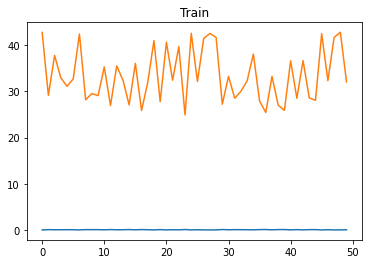

2/2 [==============================] - 1s 9ms/step


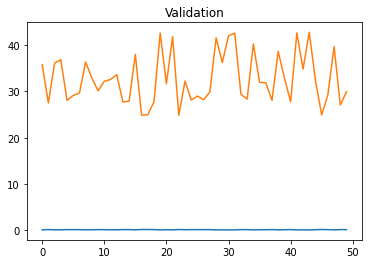

3/3 [==============================] - 0s 22ms/step


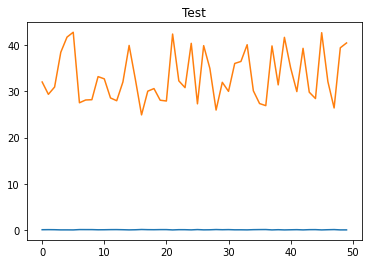

3/3 [==============================] - 0s 8ms/step


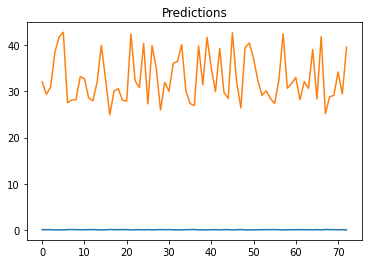

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

1095.0794246728933

### RNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 959.6517 - root_mean_squared_error: 30.9782 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 807ms/step - loss: 959.6517 - root_mean_squared_error: 30.9782 - val_loss: 1011.8250 - val_root_mean_squared_error: 31.8092
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 930.9720 - root_mean_squared_error: 30.5118INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 957.7242 - root_mean_squared_error: 30.9471 - val_loss: 1002.2157 - val_root_mean_squared_error: 31.6578
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 950.5583 - root_mean_squared_error: 30.8311INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 567ms/step - loss: 948.5027 - root_mean_squared_error: 30.7978 - val_loss: 992.6051 - val_root_mean_squared_error: 31.5056
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 938.1458 - root_mean_squared_error: 30.6292INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 933.6763 - root_mean_squared_error: 30.5561 - val_loss: 982.9232 - val_root_mean_squared_error: 31.3516
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 930.2808 - root_mean_squared_error: 30.5005INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 926.7305 - root_mean_squared_error: 30.4422 - val_loss: 973.1825 - val_root_mean_squared_error: 31.1959
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 947.9572 - root_mean_squared_error: 30.7889INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 732ms/step - loss: 914.7905 - root_mean_squared_error: 30.2455 - val_loss: 963.4121 - val_root_mean_squared_error: 31.0389
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 903.2040 - root_mean_squared_error: 30.0534INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 905.8873 - root_mean_squared_error: 30.0980 - val_loss: 953.6536 - val_root_mean_squared_error: 30.8813
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 904.8093 - root_mean_squared_error: 30.0800 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 991ms/step - loss: 904.8093 - root_mean_squared_error: 30.0800 - val_loss: 943.8202 - val_root_mean_squared_error: 30.7217
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 886.2430 - root_mean_squared_error: 29.7698INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 880.3329 - root_mean_squared_error: 29.6704 - val_loss: 933.9830 - val_root_mean_squared_error: 30.5611
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 872.1898 - root_mean_squared_error: 29.5329INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 872.1898 - root_mean_squared_error: 29.5329 - val_loss: 924.3420 - val_root_mean_squared_error: 30.4030
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 867.4416 - root_mean_squared_error: 29.4524INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 870.0845 - root_mean_squared_error: 29.4972 - val_loss: 914.7186 - val_root_mean_squared_error: 30.2443
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 867.2538 - root_mean_squared_error: 29.4492INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 782ms/step - loss: 867.2538 - root_mean_squared_error: 29.4492 - val_loss: 905.2413 - val_root_mean_squared_error: 30.0872
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 832.6428 - root_mean_squared_error: 28.8556INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 837.6236 - root_mean_squared_error: 28.9417 - val_loss: 896.0581 - val_root_mean_squared_error: 29.9342
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 867.9999 - root_mean_squared_error: 29.4618INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 778ms/step - loss: 846.4487 - root_mean_squared_error: 29.0938 - val_loss: 887.0789 - val_root_mean_squared_error: 29.7839
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 793.3514 - root_mean_squared_error: 28.1665INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 831.5300 - root_mean_squared_error: 28.8363 - val_loss: 878.2235 - val_root_mean_squared_error: 29.6348
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 820.4039 - root_mean_squared_error: 28.6427INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 825.1614 - root_mean_squared_error: 28.7256 - val_loss: 869.5776 - val_root_mean_squared_error: 29.4886
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 815.2146 - root_mean_squared_error: 28.5520INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 699ms/step - loss: 821.7736 - root_mean_squared_error: 28.6666 - val_loss: 861.2196 - val_root_mean_squared_error: 29.3465
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 806.3073 - root_mean_squared_error: 28.3955INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 533ms/step - loss: 811.5269 - root_mean_squared_error: 28.4873 - val_loss: 853.0906 - val_root_mean_squared_error: 29.2077
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 791.7669 - root_mean_squared_error: 28.1384INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 581ms/step - loss: 798.0061 - root_mean_squared_error: 28.2490 - val_loss: 845.1622 - val_root_mean_squared_error: 29.0717
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 748.7753 - root_mean_squared_error: 27.3638INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 755ms/step - loss: 790.4199 - root_mean_squared_error: 28.1144 - val_loss: 837.3540 - val_root_mean_squared_error: 28.9371
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 856.1570 - root_mean_squared_error: 29.2602INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 642ms/step - loss: 788.3306 - root_mean_squared_error: 28.0772 - val_loss: 829.8214 - val_root_mean_squared_error: 28.8066
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 781.8417 - root_mean_squared_error: 27.9614INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 607ms/step - loss: 781.8417 - root_mean_squared_error: 27.9614 - val_loss: 822.3996 - val_root_mean_squared_error: 28.6775
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 769.1926 - root_mean_squared_error: 27.7343INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 553ms/step - loss: 769.1926 - root_mean_squared_error: 27.7343 - val_loss: 815.1845 - val_root_mean_squared_error: 28.5514
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 772.0457 - root_mean_squared_error: 27.7857INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 771ms/step - loss: 772.0457 - root_mean_squared_error: 27.7857 - val_loss: 808.1610 - val_root_mean_squared_error: 28.4282
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 754.6810 - root_mean_squared_error: 27.4715INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 755.1773 - root_mean_squared_error: 27.4805 - val_loss: 801.3929 - val_root_mean_squared_error: 28.3089
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 665.9260 - root_mean_squared_error: 25.8055INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 588ms/step - loss: 746.3346 - root_mean_squared_error: 27.3191 - val_loss: 794.7543 - val_root_mean_squared_error: 28.1914
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 738.7369 - root_mean_squared_error: 27.1797INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 583ms/step - loss: 739.7409 - root_mean_squared_error: 27.1982 - val_loss: 788.1785 - val_root_mean_squared_error: 28.0745
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 728.7549 - root_mean_squared_error: 26.9955INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 737.2302 - root_mean_squared_error: 27.1520 - val_loss: 781.5363 - val_root_mean_squared_error: 27.9560
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 724.0193 - root_mean_squared_error: 26.9076INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 522ms/step - loss: 726.1954 - root_mean_squared_error: 26.9480 - val_loss: 774.6199 - val_root_mean_squared_error: 27.8320
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 749.8740 - root_mean_squared_error: 27.3838INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 0s 3ms/step


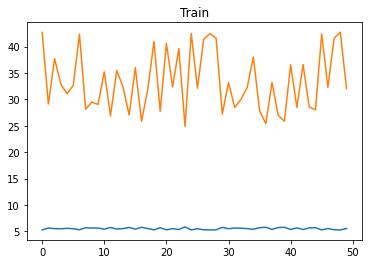

2/2 [==============================] - 1s 4ms/step


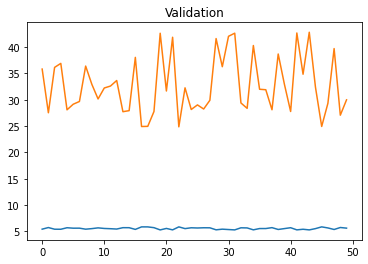

3/3 [==============================] - 0s 4ms/step


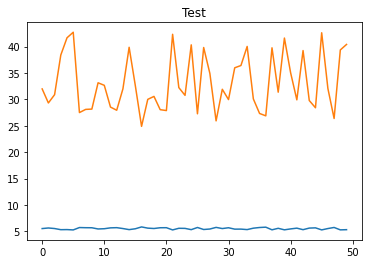

3/3 [==============================] - 0s 6ms/step


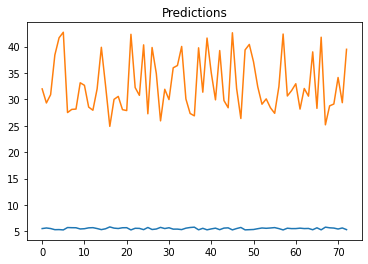

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

771.5953062928367

# Moving Average with Encoder

### CNN

Epoch 1/10
3/8 [==========>...................] - ETA: 0s - loss: 1803.3663 - root_mean_squared_error: 42.4661

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 324ms/step - loss: 1784.3781 - root_mean_squared_error: 42.2419 - val_loss: 1523.1199 - val_root_mean_squared_error: 39.0272
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1551.5442 - root_mean_squared_error: 39.3896

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 1551.5442 - root_mean_squared_error: 39.3896 - val_loss: 1423.6853 - val_root_mean_squared_error: 37.7318
Epoch 3/10
4/8 [==============>...............] - ETA: 0s - loss: 1455.4221 - root_mean_squared_error: 38.1500

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 278ms/step - loss: 1413.5387 - root_mean_squared_error: 37.5971 - val_loss: 1293.2482 - val_root_mean_squared_error: 35.9618
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 1264.2028 - root_mean_squared_error: 35.5556

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 1263.4268 - root_mean_squared_error: 35.5447 - val_loss: 1194.9418 - val_root_mean_squared_error: 34.5679
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 1166.8391 - root_mean_squared_error: 34.1590

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 494ms/step - loss: 1134.6166 - root_mean_squared_error: 33.6841 - val_loss: 1068.9519 - val_root_mean_squared_error: 32.6948
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 1034.1434 - root_mean_squared_error: 32.1581

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 409ms/step - loss: 1019.6109 - root_mean_squared_error: 31.9313 - val_loss: 940.1909 - val_root_mean_squared_error: 30.6625
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 945.2767 - root_mean_squared_error: 30.7454

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 406ms/step - loss: 944.1213 - root_mean_squared_error: 30.7266 - val_loss: 817.7826 - val_root_mean_squared_error: 28.5969
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 849.9735 - root_mean_squared_error: 29.1543

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 356ms/step - loss: 843.5471 - root_mean_squared_error: 29.0439 - val_loss: 701.4881 - val_root_mean_squared_error: 26.4856
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 736.9218 - root_mean_squared_error: 27.1463

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 416ms/step - loss: 736.7040 - root_mean_squared_error: 27.1423 - val_loss: 592.6816 - val_root_mean_squared_error: 24.3451
Epoch 10/10
5/8 [=================>............] - ETA: 0s - loss: 660.6656 - root_mean_squared_error: 25.7034

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 6ms/step


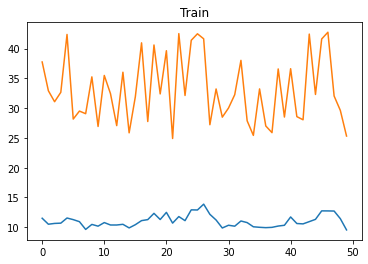

2/2 [==============================] - 0s 4ms/step


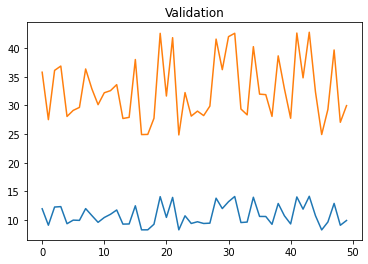

3/3 [==============================] - 0s 10ms/step


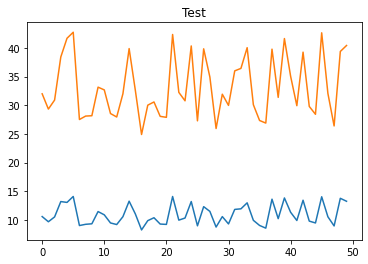

3/3 [==============================] - 0s 18ms/step


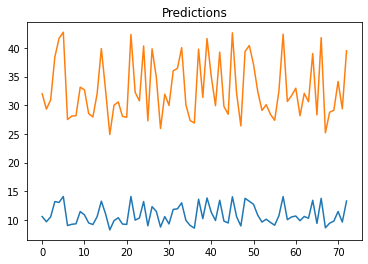

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

492.5449227854317

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 17s - loss: 994.0905 - root_mean_squared_error: 31.5292INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 700ms/step - loss: 962.3515 - root_mean_squared_error: 31.0218 - val_loss: 1015.2748 - val_root_mean_squared_error: 31.8634
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 987.8340 - root_mean_squared_error: 31.4298INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 602ms/step - loss: 954.8027 - root_mean_squared_error: 30.8999 - val_loss: 1004.9813 - val_root_mean_squared_error: 31.7014
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 944.3297 - root_mean_squared_error: 30.7299INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 951.2605 - root_mean_squared_error: 30.8425 - val_loss: 994.4670 - val_root_mean_squared_error: 31.5352
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 878.1185 - root_mean_squared_error: 29.6331INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 935.1161 - root_mean_squared_error: 30.5797 - val_loss: 983.7098 - val_root_mean_squared_error: 31.3641
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 924.6198 - root_mean_squared_error: 30.4076 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 567ms/step - loss: 923.7939 - root_mean_squared_error: 30.3940 - val_loss: 972.9000 - val_root_mean_squared_error: 31.1913
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 899.7666 - root_mean_squared_error: 29.9961INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 910.6716 - root_mean_squared_error: 30.1773 - val_loss: 961.9972 - val_root_mean_squared_error: 31.0161
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 940.4612 - root_mean_squared_error: 30.6669INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 904.5087 - root_mean_squared_error: 30.0751 - val_loss: 951.1041 - val_root_mean_squared_error: 30.8400
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 901.7845 - root_mean_squared_error: 30.0297INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 3s 493ms/step - loss: 888.5167 - root_mean_squared_error: 29.8080 - val_loss: 940.3602 - val_root_mean_squared_error: 30.6653
Epoch 9/10
1/8 [==>...........................] - ETA: 0s - loss: 899.4025 - root_mean_squared_error: 29.9900INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 571ms/step - loss: 875.9330 - root_mean_squared_error: 29.5962 - val_loss: 929.7384 - val_root_mean_squared_error: 30.4916
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 895.2720 - root_mean_squared_error: 29.9211INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


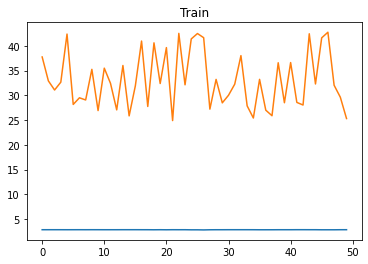

2/2 [==============================] - 1s 4ms/step


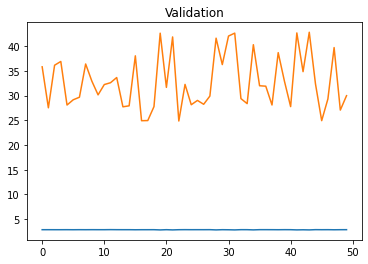

3/3 [==============================] - 0s 10ms/step


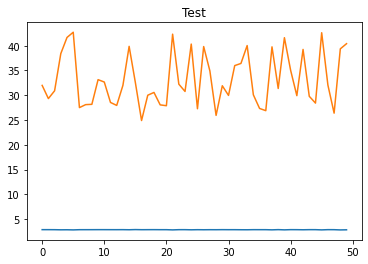

3/3 [==============================] - 0s 4ms/step


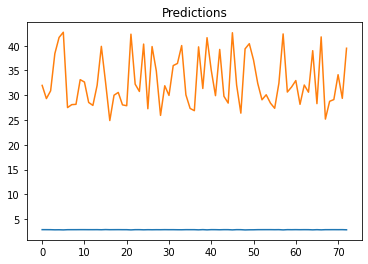

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

923.6454979483965

### GRU

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 1214.7985 - root_mean_squared_error: 34.8540 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 1202.2430 - root_mean_squared_error: 34.6734 - val_loss: 1265.2352 - val_root_mean_squared_error: 35.5701
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 1197.3430 - root_mean_squared_error: 34.6026

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1192.7601 - root_mean_squared_error: 34.5364 - val_loss: 1258.2094 - val_root_mean_squared_error: 35.4712
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 1195.9705 - root_mean_squared_error: 34.5828

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 1192.7338 - root_mean_squared_error: 34.5360 - val_loss: 1251.2578 - val_root_mean_squared_error: 35.3731
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 1147.1110 - root_mean_squared_error: 33.8690

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1177.1575 - root_mean_squared_error: 34.3097 - val_loss: 1244.3677 - val_root_mean_squared_error: 35.2756
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 1171.5382 - root_mean_squared_error: 34.2277

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 1174.5349 - root_mean_squared_error: 34.2715 - val_loss: 1237.5616 - val_root_mean_squared_error: 35.1790
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 1180.4956 - root_mean_squared_error: 34.3583

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1168.2382 - root_mean_squared_error: 34.1795 - val_loss: 1230.8070 - val_root_mean_squared_error: 35.0829
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 1162.9877 - root_mean_squared_error: 34.1026

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1157.6714 - root_mean_squared_error: 34.0246 - val_loss: 1224.1189 - val_root_mean_squared_error: 34.9874
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 1165.0061 - root_mean_squared_error: 34.1322

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 7s 1s/step - loss: 1157.6102 - root_mean_squared_error: 34.0237 - val_loss: 1217.5343 - val_root_mean_squared_error: 34.8932
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 1148.7360 - root_mean_squared_error: 33.8930

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1148.7360 - root_mean_squared_error: 33.8930 - val_loss: 1211.0383 - val_root_mean_squared_error: 34.8000
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 1142.7952 - root_mean_squared_error: 33.8053

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 1s 7ms/step


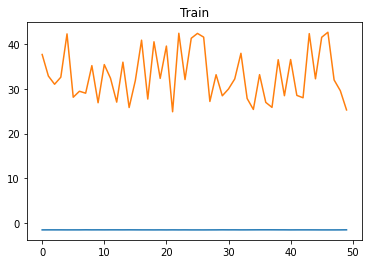

2/2 [==============================] - 1s 4ms/step


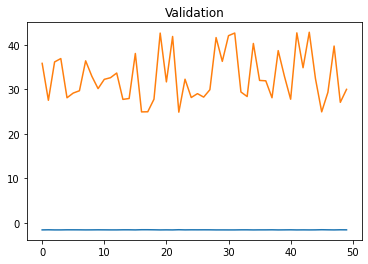

3/3 [==============================] - 0s 7ms/step


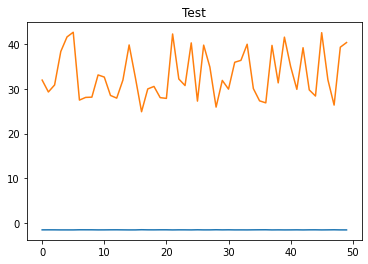

3/3 [==============================] - 0s 4ms/step


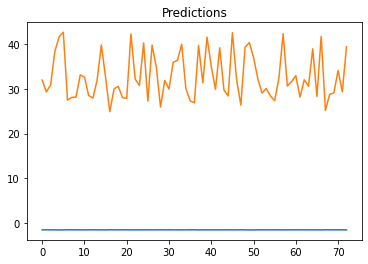

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

1209.6847037395567

### LSTM

Epoch 1/10
5/8 [=================>............] - ETA: 0s - loss: 1027.6863 - root_mean_squared_error: 32.0575 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 1013.7413 - root_mean_squared_error: 31.8393 - val_loss: 1071.4266 - val_root_mean_squared_error: 32.7327
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1008.0537 - root_mean_squared_error: 31.7499

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1008.0537 - root_mean_squared_error: 31.7499 - val_loss: 1066.7296 - val_root_mean_squared_error: 32.6608
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1002.8279 - root_mean_squared_error: 31.6675

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1002.8279 - root_mean_squared_error: 31.6675 - val_loss: 1062.0381 - val_root_mean_squared_error: 32.5889
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 995.7874 - root_mean_squared_error: 31.5561 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 997.4375 - root_mean_squared_error: 31.5822 - val_loss: 1057.3735 - val_root_mean_squared_error: 32.5173
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 999.0551 - root_mean_squared_error: 31.6078

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 990.8750 - root_mean_squared_error: 31.4782 - val_loss: 1052.7407 - val_root_mean_squared_error: 32.4460
Epoch 6/10
4/8 [==============>...............] - ETA: 0s - loss: 994.1392 - root_mean_squared_error: 31.5300 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 988.8657 - root_mean_squared_error: 31.4462 - val_loss: 1048.1656 - val_root_mean_squared_error: 32.3754
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 987.5116 - root_mean_squared_error: 31.4247

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 985.1838 - root_mean_squared_error: 31.3876 - val_loss: 1043.6263 - val_root_mean_squared_error: 32.3052
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 988.7946 - root_mean_squared_error: 31.4451 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 981.2752 - root_mean_squared_error: 31.3253 - val_loss: 1039.1012 - val_root_mean_squared_error: 32.2351
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 978.5203 - root_mean_squared_error: 31.2813

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 978.5203 - root_mean_squared_error: 31.2813 - val_loss: 1034.6335 - val_root_mean_squared_error: 32.1657
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 958.3169 - root_mean_squared_error: 30.9567

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 1s 4ms/step


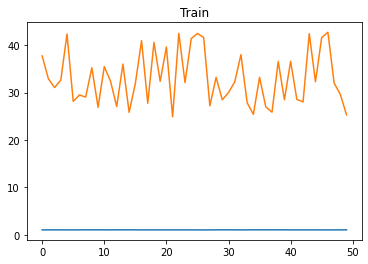

2/2 [==============================] - 1s 4ms/step


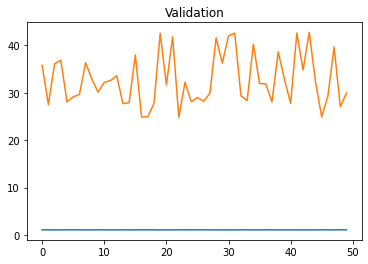

3/3 [==============================] - 0s 14ms/step


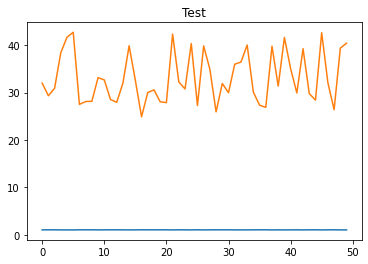

3/3 [==============================] - 0s 4ms/step


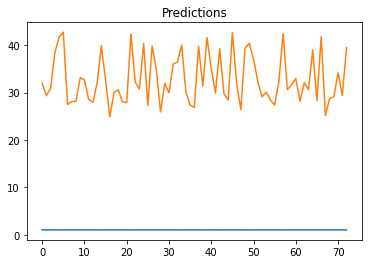

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

1034.8389505052703

# Hybrid

## General

### CNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1022.9746 - root_mean_squared_error: 31.9840

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 4s/step - loss: 1015.7177 - root_mean_squared_error: 31.8703 - val_loss: 1048.2218 - val_root_mean_squared_error: 32.3763
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 973.8823 - root_mean_squared_error: 31.2071

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 981.2272 - root_mean_squared_error: 31.3245 - val_loss: 1027.2301 - val_root_mean_squared_error: 32.0504
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 964.0549 - root_mean_squared_error: 31.0492

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 964.0549 - root_mean_squared_error: 31.0492 - val_loss: 1012.6235 - val_root_mean_squared_error: 31.8217
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 946.1652 - root_mean_squared_error: 30.7598

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 950.0956 - root_mean_squared_error: 30.8236 - val_loss: 998.6105 - val_root_mean_squared_error: 31.6008
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 941.5927 - root_mean_squared_error: 30.6854

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 936.4006 - root_mean_squared_error: 30.6007 - val_loss: 984.5591 - val_root_mean_squared_error: 31.3777
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 924.3853 - root_mean_squared_error: 30.4037

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 922.8550 - root_mean_squared_error: 30.3785 - val_loss: 970.8040 - val_root_mean_squared_error: 31.1577
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 915.7432 - root_mean_squared_error: 30.2612

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 909.6362 - root_mean_squared_error: 30.1602 - val_loss: 957.3248 - val_root_mean_squared_error: 30.9407
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 896.6507 - root_mean_squared_error: 29.9441

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 896.6507 - root_mean_squared_error: 29.9441 - val_loss: 944.1921 - val_root_mean_squared_error: 30.7277
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 879.7347 - root_mean_squared_error: 29.6603

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 883.9464 - root_mean_squared_error: 29.7312 - val_loss: 931.0539 - val_root_mean_squared_error: 30.5132
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 868.9911 - root_mean_squared_error: 29.4787

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 871.0185 - root_mean_squared_error: 29.5130 - val_loss: 917.6335 - val_root_mean_squared_error: 30.2925
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 860.6588 - root_mean_squared_error: 29.3370

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 857.8966 - root_mean_squared_error: 29.2899 - val_loss: 903.8555 - val_root_mean_squared_error: 30.0642
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 839.8063 - root_mean_squared_error: 28.9794

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 844.3428 - root_mean_squared_error: 29.0576 - val_loss: 889.8054 - val_root_mean_squared_error: 29.8296
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 832.7027 - root_mean_squared_error: 28.8566

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 830.6321 - root_mean_squared_error: 28.8207 - val_loss: 875.3915 - val_root_mean_squared_error: 29.5870
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 816.5449 - root_mean_squared_error: 28.5752

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 816.5449 - root_mean_squared_error: 28.5752 - val_loss: 860.9301 - val_root_mean_squared_error: 29.3416
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 802.3629 - root_mean_squared_error: 28.3260

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 802.4728 - root_mean_squared_error: 28.3280 - val_loss: 846.5455 - val_root_mean_squared_error: 29.0955
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 788.4453 - root_mean_squared_error: 28.0793

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 788.6119 - root_mean_squared_error: 28.0822 - val_loss: 832.4376 - val_root_mean_squared_error: 28.8520
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 777.9594 - root_mean_squared_error: 27.8919

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 775.1208 - root_mean_squared_error: 27.8410 - val_loss: 818.7000 - val_root_mean_squared_error: 28.6129
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 764.1791 - root_mean_squared_error: 27.6438

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 761.9225 - root_mean_squared_error: 27.6029 - val_loss: 805.3990 - val_root_mean_squared_error: 28.3796
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 747.7023 - root_mean_squared_error: 27.3441

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 749.1343 - root_mean_squared_error: 27.3703 - val_loss: 792.4576 - val_root_mean_squared_error: 28.1506
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 733.8341 - root_mean_squared_error: 27.0894

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 736.8217 - root_mean_squared_error: 27.1445 - val_loss: 779.8467 - val_root_mean_squared_error: 27.9257
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 724.8226 - root_mean_squared_error: 26.9225

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 724.8226 - root_mean_squared_error: 26.9225 - val_loss: 767.8580 - val_root_mean_squared_error: 27.7103
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 712.7493 - root_mean_squared_error: 26.6974

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 713.6252 - root_mean_squared_error: 26.7138 - val_loss: 756.8173 - val_root_mean_squared_error: 27.5103
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 704.1543 - root_mean_squared_error: 26.5359

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 703.3483 - root_mean_squared_error: 26.5207 - val_loss: 746.8676 - val_root_mean_squared_error: 27.3289
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 704.8254 - root_mean_squared_error: 26.5485

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 694.1971 - root_mean_squared_error: 26.3476 - val_loss: 737.8638 - val_root_mean_squared_error: 27.1636
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 683.0040 - root_mean_squared_error: 26.1343

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 685.8439 - root_mean_squared_error: 26.1886 - val_loss: 729.6627 - val_root_mean_squared_error: 27.0123
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 683.9988 - root_mean_squared_error: 26.1534

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 678.2026 - root_mean_squared_error: 26.0423 - val_loss: 722.0804 - val_root_mean_squared_error: 26.8716
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 665.3356 - root_mean_squared_error: 25.7941

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 671.0920 - root_mean_squared_error: 25.9054 - val_loss: 715.0812 - val_root_mean_squared_error: 26.7410
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 659.7449 - root_mean_squared_error: 25.6855

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 664.5062 - root_mean_squared_error: 25.7780 - val_loss: 708.5292 - val_root_mean_squared_error: 26.6182
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 659.2831 - root_mean_squared_error: 25.6765

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 658.3954 - root_mean_squared_error: 25.6592 - val_loss: 702.4102 - val_root_mean_squared_error: 26.5030
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 653.0386 - root_mean_squared_error: 25.5546

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 17ms/step


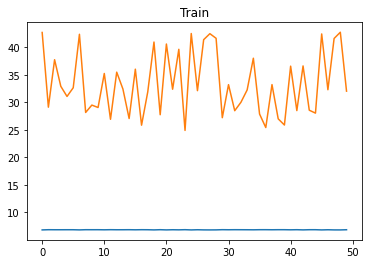

2/2 [==============================] - 3s 10ms/step


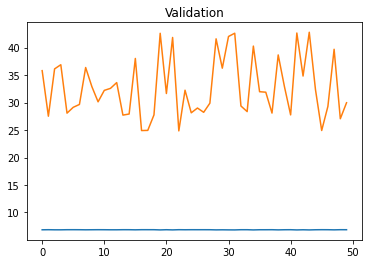

3/3 [==============================] - 0s 12ms/step


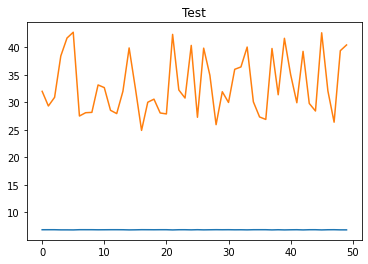

3/3 [==============================] - 0s 7ms/step


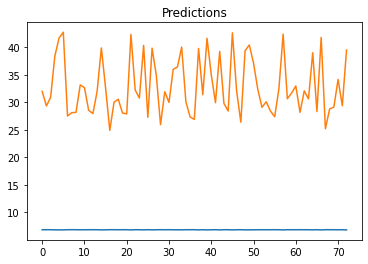

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

700.4172030470024

### RNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1075.2288 - root_mean_squared_error: 32.7907 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 2s/step - loss: 1075.2288 - root_mean_squared_error: 32.7907 - val_loss: 1125.9633 - val_root_mean_squared_error: 33.5554
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 1067.3822 - root_mean_squared_error: 32.6708

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1058.8345 - root_mean_squared_error: 32.5397 - val_loss: 1109.1420 - val_root_mean_squared_error: 33.3038
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 1049.4713 - root_mean_squared_error: 32.3955

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1042.4373 - root_mean_squared_error: 32.2868 - val_loss: 1092.1719 - val_root_mean_squared_error: 33.0480
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 1028.8928 - root_mean_squared_error: 32.0764

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1025.7205 - root_mean_squared_error: 32.0269 - val_loss: 1074.9180 - val_root_mean_squared_error: 32.7859
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 1017.6594 - root_mean_squared_error: 31.9008

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1008.7518 - root_mean_squared_error: 31.7609 - val_loss: 1057.1498 - val_root_mean_squared_error: 32.5138
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 979.8377 - root_mean_squared_error: 31.3024 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 991.2787 - root_mean_squared_error: 31.4846 - val_loss: 1038.9730 - val_root_mean_squared_error: 32.2331
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 997.1705 - root_mean_squared_error: 31.5780

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 973.5213 - root_mean_squared_error: 31.2013 - val_loss: 1020.5342 - val_root_mean_squared_error: 31.9458
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 968.5590 - root_mean_squared_error: 31.1217 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 955.6085 - root_mean_squared_error: 30.9129 - val_loss: 1002.1459 - val_root_mean_squared_error: 31.6567
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 937.8981 - root_mean_squared_error: 30.6251

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 937.8829 - root_mean_squared_error: 30.6249 - val_loss: 984.0471 - val_root_mean_squared_error: 31.3695
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 920.2261 - root_mean_squared_error: 30.3352

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 920.5627 - root_mean_squared_error: 30.3408 - val_loss: 966.3773 - val_root_mean_squared_error: 31.0866
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 907.1503 - root_mean_squared_error: 30.1189

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 903.5132 - root_mean_squared_error: 30.0585 - val_loss: 949.1041 - val_root_mean_squared_error: 30.8075
Epoch 12/30
5/8 [=================>............] - ETA: 0s - loss: 873.1361 - root_mean_squared_error: 29.5489

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 886.8840 - root_mean_squared_error: 29.7806 - val_loss: 932.2137 - val_root_mean_squared_error: 30.5322
Epoch 13/30
4/8 [==============>...............] - ETA: 0s - loss: 885.9535 - root_mean_squared_error: 29.7650

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 870.7451 - root_mean_squared_error: 29.5084 - val_loss: 915.6239 - val_root_mean_squared_error: 30.2593
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 852.1254 - root_mean_squared_error: 29.1912

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 854.8271 - root_mean_squared_error: 29.2374 - val_loss: 899.4805 - val_root_mean_squared_error: 29.9913
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 841.3907 - root_mean_squared_error: 29.0067

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 839.2975 - root_mean_squared_error: 28.9706 - val_loss: 883.7761 - val_root_mean_squared_error: 29.7284
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 824.4156 - root_mean_squared_error: 28.7126

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 824.3111 - root_mean_squared_error: 28.7108 - val_loss: 868.5795 - val_root_mean_squared_error: 29.4717
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 803.6578 - root_mean_squared_error: 28.3489

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 809.8442 - root_mean_squared_error: 28.4578 - val_loss: 853.8999 - val_root_mean_squared_error: 29.2216
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 801.5003 - root_mean_squared_error: 28.3108

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 795.8989 - root_mean_squared_error: 28.2117 - val_loss: 839.8396 - val_root_mean_squared_error: 28.9800
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 782.5377 - root_mean_squared_error: 27.9739

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 782.5377 - root_mean_squared_error: 27.9739 - val_loss: 826.3593 - val_root_mean_squared_error: 28.7465
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 768.0381 - root_mean_squared_error: 27.7135

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 769.6765 - root_mean_squared_error: 27.7430 - val_loss: 813.4513 - val_root_mean_squared_error: 28.5211
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 762.2905 - root_mean_squared_error: 27.6096

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 757.3763 - root_mean_squared_error: 27.5205 - val_loss: 801.0938 - val_root_mean_squared_error: 28.3036
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 762.8704 - root_mean_squared_error: 27.6201

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 745.7289 - root_mean_squared_error: 27.3080 - val_loss: 789.3431 - val_root_mean_squared_error: 28.0953
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 734.5463 - root_mean_squared_error: 27.1025

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 734.5463 - root_mean_squared_error: 27.1025 - val_loss: 778.1995 - val_root_mean_squared_error: 27.8962
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 728.6165 - root_mean_squared_error: 26.9929

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 723.9753 - root_mean_squared_error: 26.9068 - val_loss: 767.4564 - val_root_mean_squared_error: 27.7030
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 711.5214 - root_mean_squared_error: 26.6744

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 713.8015 - root_mean_squared_error: 26.7171 - val_loss: 757.2815 - val_root_mean_squared_error: 27.5187
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 703.0632 - root_mean_squared_error: 26.5153

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 704.1187 - root_mean_squared_error: 26.5352 - val_loss: 747.5580 - val_root_mean_squared_error: 27.3415
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 699.1144 - root_mean_squared_error: 26.4408

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 694.9000 - root_mean_squared_error: 26.3610 - val_loss: 738.2504 - val_root_mean_squared_error: 27.1708
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 695.7964 - root_mean_squared_error: 26.3780

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 686.1592 - root_mean_squared_error: 26.1946 - val_loss: 729.4108 - val_root_mean_squared_error: 27.0076
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 687.0342 - root_mean_squared_error: 26.2113

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 677.7902 - root_mean_squared_error: 26.0344 - val_loss: 721.0405 - val_root_mean_squared_error: 26.8522
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 686.0953 - root_mean_squared_error: 26.1934

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 7ms/step


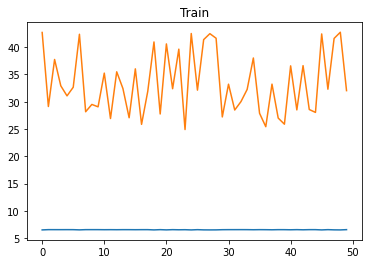

2/2 [==============================] - 2s 11ms/step


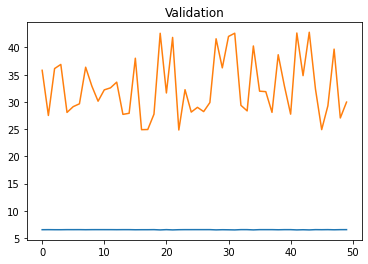

3/3 [==============================] - 0s 21ms/step


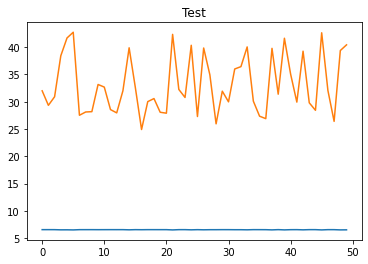

3/3 [==============================] - 0s 6ms/step


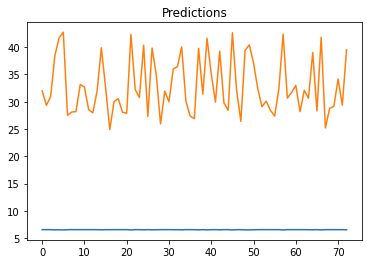

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

716.7607477696318

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1016.0491 - root_mean_squared_error: 31.8755

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 1016.0491 - root_mean_squared_error: 31.8755 - val_loss: 1062.8005 - val_root_mean_squared_error: 32.6006
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 1022.5352 - root_mean_squared_error: 31.9771

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 996.9520 - root_mean_squared_error: 31.5745 - val_loss: 1043.4697 - val_root_mean_squared_error: 32.3028
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 969.5270 - root_mean_squared_error: 31.1372

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 978.2684 - root_mean_squared_error: 31.2773 - val_loss: 1024.5863 - val_root_mean_squared_error: 32.0092
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 956.8965 - root_mean_squared_error: 30.9337 

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 960.0896 - root_mean_squared_error: 30.9853 - val_loss: 1006.1346 - val_root_mean_squared_error: 31.7196
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 911.3015 - root_mean_squared_error: 30.1878

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 942.2905 - root_mean_squared_error: 30.6968 - val_loss: 988.2870 - val_root_mean_squared_error: 31.4370
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 925.1699 - root_mean_squared_error: 30.4166

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 925.1699 - root_mean_squared_error: 30.4166 - val_loss: 970.9865 - val_root_mean_squared_error: 31.1607
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 905.3187 - root_mean_squared_error: 30.0885

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 908.5789 - root_mean_squared_error: 30.1426 - val_loss: 954.1901 - val_root_mean_squared_error: 30.8900
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 892.4913 - root_mean_squared_error: 29.8746

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 892.4913 - root_mean_squared_error: 29.8746 - val_loss: 937.9943 - val_root_mean_squared_error: 30.6267
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 877.3331 - root_mean_squared_error: 29.6198

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 877.0026 - root_mean_squared_error: 29.6142 - val_loss: 922.4232 - val_root_mean_squared_error: 30.3714
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 857.0420 - root_mean_squared_error: 29.2753

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 862.0787 - root_mean_squared_error: 29.3612 - val_loss: 907.3606 - val_root_mean_squared_error: 30.1224
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 847.7426 - root_mean_squared_error: 29.1160

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 847.6296 - root_mean_squared_error: 29.1141 - val_loss: 892.7408 - val_root_mean_squared_error: 29.8788
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 833.6041 - root_mean_squared_error: 28.8722

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 833.6041 - root_mean_squared_error: 28.8722 - val_loss: 878.5723 - val_root_mean_squared_error: 29.6407
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 817.2640 - root_mean_squared_error: 28.5878

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 820.0164 - root_mean_squared_error: 28.6359 - val_loss: 864.8751 - val_root_mean_squared_error: 29.4088
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 800.6566 - root_mean_squared_error: 28.2959

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 806.8866 - root_mean_squared_error: 28.4058 - val_loss: 851.5593 - val_root_mean_squared_error: 29.1815
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 799.2263 - root_mean_squared_error: 28.2706

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 794.1740 - root_mean_squared_error: 28.1811 - val_loss: 838.7349 - val_root_mean_squared_error: 28.9609
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 785.9647 - root_mean_squared_error: 28.0351

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 781.9644 - root_mean_squared_error: 27.9636 - val_loss: 826.4075 - val_root_mean_squared_error: 28.7473
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 771.7502 - root_mean_squared_error: 27.7804

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 770.1442 - root_mean_squared_error: 27.7515 - val_loss: 814.6596 - val_root_mean_squared_error: 28.5422
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 759.0930 - root_mean_squared_error: 27.5516

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 759.0930 - root_mean_squared_error: 27.5516 - val_loss: 803.4969 - val_root_mean_squared_error: 28.3460
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 744.6110 - root_mean_squared_error: 27.2876

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 748.5020 - root_mean_squared_error: 27.3588 - val_loss: 793.0737 - val_root_mean_squared_error: 28.1616
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 737.6832 - root_mean_squared_error: 27.1603

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 738.6859 - root_mean_squared_error: 27.1788 - val_loss: 783.2473 - val_root_mean_squared_error: 27.9866
Epoch 21/30
4/8 [==============>...............] - ETA: 0s - loss: 744.4409 - root_mean_squared_error: 27.2844

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 729.4265 - root_mean_squared_error: 27.0079 - val_loss: 774.0475 - val_root_mean_squared_error: 27.8217
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 741.7228 - root_mean_squared_error: 27.2346

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 720.7778 - root_mean_squared_error: 26.8473 - val_loss: 765.4752 - val_root_mean_squared_error: 27.6672
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 721.9879 - root_mean_squared_error: 26.8698

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 712.7333 - root_mean_squared_error: 26.6971 - val_loss: 757.5043 - val_root_mean_squared_error: 27.5228
Epoch 24/30
5/8 [=================>............] - ETA: 0s - loss: 681.5330 - root_mean_squared_error: 26.1062

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 705.2111 - root_mean_squared_error: 26.5558 - val_loss: 750.0696 - val_root_mean_squared_error: 27.3874
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 700.3459 - root_mean_squared_error: 26.4640

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 698.2164 - root_mean_squared_error: 26.4238 - val_loss: 743.0689 - val_root_mean_squared_error: 27.2593
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 683.5591 - root_mean_squared_error: 26.1450

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 691.6072 - root_mean_squared_error: 26.2984 - val_loss: 736.5144 - val_root_mean_squared_error: 27.1388
Epoch 27/30
5/8 [=================>............] - ETA: 0s - loss: 686.3351 - root_mean_squared_error: 26.1980

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 685.4307 - root_mean_squared_error: 26.1807 - val_loss: 730.3367 - val_root_mean_squared_error: 27.0247
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 680.6426 - root_mean_squared_error: 26.0891

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 679.5811 - root_mean_squared_error: 26.0688 - val_loss: 724.4838 - val_root_mean_squared_error: 26.9162
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 674.5728 - root_mean_squared_error: 25.9725

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 674.0327 - root_mean_squared_error: 25.9621 - val_loss: 718.9208 - val_root_mean_squared_error: 26.8127
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 670.4932 - root_mean_squared_error: 25.8939

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 2s 6ms/step


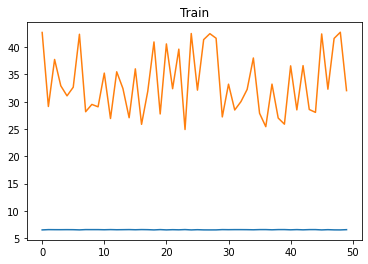

2/2 [==============================] - 1s 7ms/step


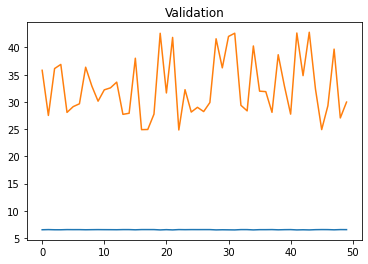

3/3 [==============================] - 0s 6ms/step


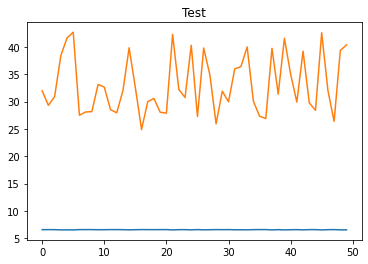

3/3 [==============================] - 0s 4ms/step


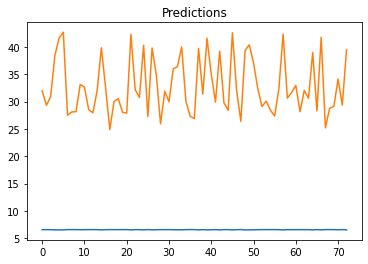

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

717.294418094939

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1039.4869 - root_mean_squared_error: 32.2411

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 3s/step - loss: 1039.8097 - root_mean_squared_error: 32.2461 - val_loss: 1077.5051 - val_root_mean_squared_error: 32.8254
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 1005.2934 - root_mean_squared_error: 31.7064

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 1005.4210 - root_mean_squared_error: 31.7084 - val_loss: 1042.6941 - val_root_mean_squared_error: 32.2908
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 970.2135 - root_mean_squared_error: 31.1483

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 971.6389 - root_mean_squared_error: 31.1711 - val_loss: 1008.0741 - val_root_mean_squared_error: 31.7502
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 938.1982 - root_mean_squared_error: 30.6300

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 938.1982 - root_mean_squared_error: 30.6300 - val_loss: 974.1703 - val_root_mean_squared_error: 31.2117
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 905.8470 - root_mean_squared_error: 30.0973

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 906.0923 - root_mean_squared_error: 30.1014 - val_loss: 942.8987 - val_root_mean_squared_error: 30.7067
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 881.3493 - root_mean_squared_error: 29.6875

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 877.6406 - root_mean_squared_error: 29.6250 - val_loss: 915.9100 - val_root_mean_squared_error: 30.2640
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 853.2756 - root_mean_squared_error: 29.2109

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 853.2756 - root_mean_squared_error: 29.2109 - val_loss: 893.1346 - val_root_mean_squared_error: 29.8854
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 829.1247 - root_mean_squared_error: 28.7945

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 832.3302 - root_mean_squared_error: 28.8501 - val_loss: 873.0927 - val_root_mean_squared_error: 29.5481
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 813.4855 - root_mean_squared_error: 28.5217

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 813.4855 - root_mean_squared_error: 28.5217 - val_loss: 854.8006 - val_root_mean_squared_error: 29.2370
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 792.8173 - root_mean_squared_error: 28.1570

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 796.2075 - root_mean_squared_error: 28.2171 - val_loss: 837.7258 - val_root_mean_squared_error: 28.9435
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 779.9514 - root_mean_squared_error: 27.9276

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 779.9514 - root_mean_squared_error: 27.9276 - val_loss: 821.7912 - val_root_mean_squared_error: 28.6669
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 764.7807 - root_mean_squared_error: 27.6547

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 764.7807 - root_mean_squared_error: 27.6547 - val_loss: 806.8621 - val_root_mean_squared_error: 28.4053
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 752.1561 - root_mean_squared_error: 27.4255

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 750.4454 - root_mean_squared_error: 27.3943 - val_loss: 792.7668 - val_root_mean_squared_error: 28.1561
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 737.0006 - root_mean_squared_error: 27.1478

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 737.0006 - root_mean_squared_error: 27.1478 - val_loss: 779.4880 - val_root_mean_squared_error: 27.9193
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 723.7565 - root_mean_squared_error: 26.9027

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 724.4055 - root_mean_squared_error: 26.9148 - val_loss: 767.1371 - val_root_mean_squared_error: 27.6972
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 703.6260 - root_mean_squared_error: 26.5259

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 712.6448 - root_mean_squared_error: 26.6954 - val_loss: 755.6436 - val_root_mean_squared_error: 27.4890
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 698.7225 - root_mean_squared_error: 26.4334

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 701.7977 - root_mean_squared_error: 26.4915 - val_loss: 744.8606 - val_root_mean_squared_error: 27.2921
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 691.7265 - root_mean_squared_error: 26.3007

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 691.7265 - root_mean_squared_error: 26.3007 - val_loss: 734.9747 - val_root_mean_squared_error: 27.1104
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 678.9796 - root_mean_squared_error: 26.0572

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 682.6287 - root_mean_squared_error: 26.1272 - val_loss: 726.1752 - val_root_mean_squared_error: 26.9476
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 666.7935 - root_mean_squared_error: 25.8223

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 674.5711 - root_mean_squared_error: 25.9725 - val_loss: 718.3301 - val_root_mean_squared_error: 26.8017
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 669.4808 - root_mean_squared_error: 25.8743

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 667.3077 - root_mean_squared_error: 25.8323 - val_loss: 711.2329 - val_root_mean_squared_error: 26.6690
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 658.3425 - root_mean_squared_error: 25.6582

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 660.8010 - root_mean_squared_error: 25.7061 - val_loss: 704.8904 - val_root_mean_squared_error: 26.5498
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 651.5532 - root_mean_squared_error: 25.5255

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 654.9492 - root_mean_squared_error: 25.5920 - val_loss: 699.1649 - val_root_mean_squared_error: 26.4417
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 649.6751 - root_mean_squared_error: 25.4887

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 649.6751 - root_mean_squared_error: 25.4887 - val_loss: 694.0111 - val_root_mean_squared_error: 26.3441
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 648.0814 - root_mean_squared_error: 25.4574

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 644.9225 - root_mean_squared_error: 25.3953 - val_loss: 689.3960 - val_root_mean_squared_error: 26.2564
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 643.5140 - root_mean_squared_error: 25.3676

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 640.6786 - root_mean_squared_error: 25.3116 - val_loss: 685.2437 - val_root_mean_squared_error: 26.1772
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 632.0558 - root_mean_squared_error: 25.1407

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 636.8281 - root_mean_squared_error: 25.2355 - val_loss: 681.4242 - val_root_mean_squared_error: 26.1041
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 636.4861 - root_mean_squared_error: 25.2287

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 633.2465 - root_mean_squared_error: 25.1644 - val_loss: 677.8501 - val_root_mean_squared_error: 26.0356
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 626.7247 - root_mean_squared_error: 25.0345

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 629.8961 - root_mean_squared_error: 25.0977 - val_loss: 674.5273 - val_root_mean_squared_error: 25.9717
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 626.4598 - root_mean_squared_error: 25.0292

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 2s 21ms/step


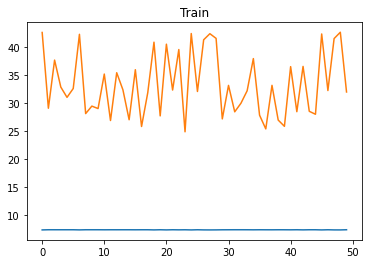

2/2 [==============================] - 2s 10ms/step


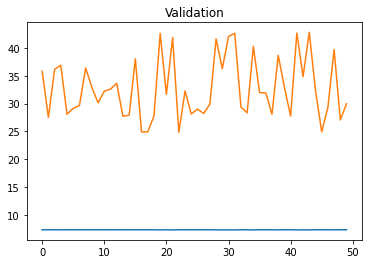

3/3 [==============================] - 0s 9ms/step


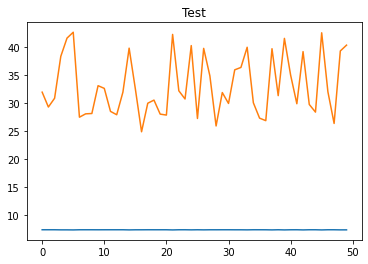

3/3 [==============================] - 0s 19ms/step


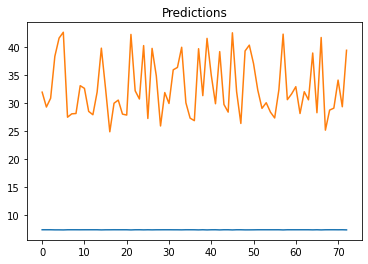

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

674.9164255731448

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1021.5875 - root_mean_squared_error: 31.9623

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 2s/step - loss: 1021.5875 - root_mean_squared_error: 31.9623 - val_loss: 1065.0000 - val_root_mean_squared_error: 32.6343
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 996.7955 - root_mean_squared_error: 31.5721

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 996.7955 - root_mean_squared_error: 31.5721 - val_loss: 1040.4025 - val_root_mean_squared_error: 32.2553
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 977.3455 - root_mean_squared_error: 31.2625

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 973.5649 - root_mean_squared_error: 31.2020 - val_loss: 1017.8012 - val_root_mean_squared_error: 31.9030
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 964.3292 - root_mean_squared_error: 31.0536

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 952.4458 - root_mean_squared_error: 30.8617 - val_loss: 997.2434 - val_root_mean_squared_error: 31.5792
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 934.9213 - root_mean_squared_error: 30.5765

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 933.1088 - root_mean_squared_error: 30.5468 - val_loss: 978.1887 - val_root_mean_squared_error: 31.2760
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 921.3228 - root_mean_squared_error: 30.3533

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 914.9814 - root_mean_squared_error: 30.2487 - val_loss: 959.9857 - val_root_mean_squared_error: 30.9836
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 893.0176 - root_mean_squared_error: 29.8834

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 897.4731 - root_mean_squared_error: 29.9579 - val_loss: 942.1393 - val_root_mean_squared_error: 30.6943
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 880.1382 - root_mean_squared_error: 29.6671

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 880.1382 - root_mean_squared_error: 29.6671 - val_loss: 924.4399 - val_root_mean_squared_error: 30.4046
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 860.4847 - root_mean_squared_error: 29.3340

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 863.2565 - root_mean_squared_error: 29.3812 - val_loss: 907.2004 - val_root_mean_squared_error: 30.1198
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 856.6262 - root_mean_squared_error: 29.2682

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 846.9977 - root_mean_squared_error: 29.1032 - val_loss: 891.1285 - val_root_mean_squared_error: 29.8518
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 833.1734 - root_mean_squared_error: 28.8647

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 831.9323 - root_mean_squared_error: 28.8432 - val_loss: 876.7471 - val_root_mean_squared_error: 29.6099
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 818.7036 - root_mean_squared_error: 28.6130

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 818.7036 - root_mean_squared_error: 28.6130 - val_loss: 863.8241 - val_root_mean_squared_error: 29.3909
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 812.5438 - root_mean_squared_error: 28.5052

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 806.5500 - root_mean_squared_error: 28.3998 - val_loss: 851.9999 - val_root_mean_squared_error: 29.1890
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 790.0645 - root_mean_squared_error: 28.1081

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 795.4230 - root_mean_squared_error: 28.2032 - val_loss: 840.9156 - val_root_mean_squared_error: 28.9985
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 784.9061 - root_mean_squared_error: 28.0162

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 784.9061 - root_mean_squared_error: 28.0162 - val_loss: 830.2709 - val_root_mean_squared_error: 28.8144
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 775.5926 - root_mean_squared_error: 27.8495

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 774.7189 - root_mean_squared_error: 27.8338 - val_loss: 820.0789 - val_root_mean_squared_error: 28.6370
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 768.3781 - root_mean_squared_error: 27.7196

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 764.9516 - root_mean_squared_error: 27.6578 - val_loss: 810.1500 - val_root_mean_squared_error: 28.4631
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 755.4440 - root_mean_squared_error: 27.4853

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 755.4440 - root_mean_squared_error: 27.4853 - val_loss: 800.4954 - val_root_mean_squared_error: 28.2930
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 745.3157 - root_mean_squared_error: 27.3005

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 746.1721 - root_mean_squared_error: 27.3162 - val_loss: 791.0260 - val_root_mean_squared_error: 28.1252
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 739.8645 - root_mean_squared_error: 27.2005

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 737.0826 - root_mean_squared_error: 27.1493 - val_loss: 781.7287 - val_root_mean_squared_error: 27.9594
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 741.5728 - root_mean_squared_error: 27.2318

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 728.1850 - root_mean_squared_error: 26.9849 - val_loss: 772.6708 - val_root_mean_squared_error: 27.7970
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 726.7419 - root_mean_squared_error: 26.9582

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 719.5081 - root_mean_squared_error: 26.8236 - val_loss: 763.8720 - val_root_mean_squared_error: 27.6382
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 713.9552 - root_mean_squared_error: 26.7199

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 711.1169 - root_mean_squared_error: 26.6668 - val_loss: 755.3695 - val_root_mean_squared_error: 27.4840
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 694.6885 - root_mean_squared_error: 26.3569

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 702.9917 - root_mean_squared_error: 26.5140 - val_loss: 747.1445 - val_root_mean_squared_error: 27.3339
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 698.2754 - root_mean_squared_error: 26.4249

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 695.1757 - root_mean_squared_error: 26.3662 - val_loss: 739.1767 - val_root_mean_squared_error: 27.1878
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 685.1727 - root_mean_squared_error: 26.1758

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 687.5565 - root_mean_squared_error: 26.2213 - val_loss: 731.4158 - val_root_mean_squared_error: 27.0447
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 680.1584 - root_mean_squared_error: 26.0798

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 680.1584 - root_mean_squared_error: 26.0798 - val_loss: 723.9005 - val_root_mean_squared_error: 26.9054
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 669.3223 - root_mean_squared_error: 25.8713

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 673.0001 - root_mean_squared_error: 25.9422 - val_loss: 716.6921 - val_root_mean_squared_error: 26.7711
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 666.1007 - root_mean_squared_error: 25.8089

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 666.1007 - root_mean_squared_error: 25.8089 - val_loss: 709.6512 - val_root_mean_squared_error: 26.6393
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 659.3969 - root_mean_squared_error: 25.6787

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 2s 11ms/step


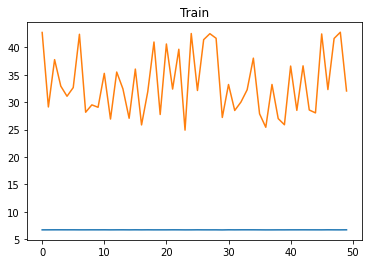

2/2 [==============================] - 1s 16ms/step


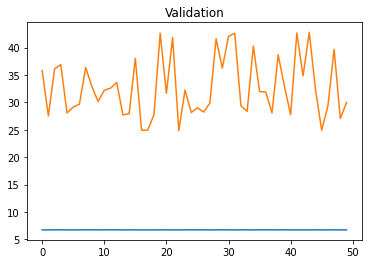

3/3 [==============================] - 0s 34ms/step


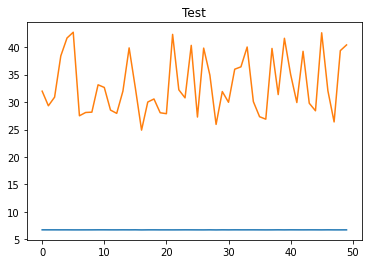

3/3 [==============================] - 0s 20ms/step


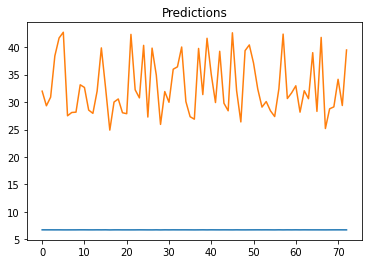

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

706.4244113735601

### LSTM RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1025.3928 - root_mean_squared_error: 32.0218 

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 4s/step - loss: 1025.3928 - root_mean_squared_error: 32.0218 - val_loss: 1066.9873 - val_root_mean_squared_error: 32.6648
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 996.1500 - root_mean_squared_error: 31.5618 

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 997.7000 - root_mean_squared_error: 31.5864 - val_loss: 1038.6499 - val_root_mean_squared_error: 32.2281
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 965.0680 - root_mean_squared_error: 31.0655 

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 970.0621 - root_mean_squared_error: 31.1458 - val_loss: 1009.4089 - val_root_mean_squared_error: 31.7712
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 939.4594 - root_mean_squared_error: 30.6506

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 940.8324 - root_mean_squared_error: 30.6730 - val_loss: 977.9051 - val_root_mean_squared_error: 31.2715
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 911.9093 - root_mean_squared_error: 30.1978

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 909.0618 - root_mean_squared_error: 30.1507 - val_loss: 943.0032 - val_root_mean_squared_error: 30.7084
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 873.5708 - root_mean_squared_error: 29.5562

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 873.5708 - root_mean_squared_error: 29.5562 - val_loss: 904.2147 - val_root_mean_squared_error: 30.0702
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 833.6894 - root_mean_squared_error: 28.8737

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 834.5401 - root_mean_squared_error: 28.8884 - val_loss: 861.6074 - val_root_mean_squared_error: 29.3531
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 796.9928 - root_mean_squared_error: 28.2311

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 792.3679 - root_mean_squared_error: 28.1490 - val_loss: 816.7509 - val_root_mean_squared_error: 28.5789
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 748.8008 - root_mean_squared_error: 27.3642

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 748.8008 - root_mean_squared_error: 27.3642 - val_loss: 771.6707 - val_root_mean_squared_error: 27.7790
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 705.9028 - root_mean_squared_error: 26.5688

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 705.5857 - root_mean_squared_error: 26.5629 - val_loss: 728.1434 - val_root_mean_squared_error: 26.9841
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 669.7770 - root_mean_squared_error: 25.8801

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 664.6893 - root_mean_squared_error: 25.7816 - val_loss: 687.8774 - val_root_mean_squared_error: 26.2274
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 624.1409 - root_mean_squared_error: 24.9828

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 627.3401 - root_mean_squared_error: 25.0468 - val_loss: 652.1934 - val_root_mean_squared_error: 25.5381
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 592.6784 - root_mean_squared_error: 24.3450

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 594.6700 - root_mean_squared_error: 24.3859 - val_loss: 621.3325 - val_root_mean_squared_error: 24.9265
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 569.1141 - root_mean_squared_error: 23.8561

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 566.9806 - root_mean_squared_error: 23.8114 - val_loss: 595.5870 - val_root_mean_squared_error: 24.4047
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 544.0722 - root_mean_squared_error: 23.3254

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 544.0722 - root_mean_squared_error: 23.3254 - val_loss: 574.7462 - val_root_mean_squared_error: 23.9739
Epoch 16/30
5/8 [=================>............] - ETA: 0s - loss: 518.5612 - root_mean_squared_error: 22.7719

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 525.4980 - root_mean_squared_error: 22.9237 - val_loss: 557.9924 - val_root_mean_squared_error: 23.6219
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 508.6906 - root_mean_squared_error: 22.5542

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 510.6425 - root_mean_squared_error: 22.5974 - val_loss: 544.5233 - val_root_mean_squared_error: 23.3350
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 498.1121 - root_mean_squared_error: 22.3184

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 498.7477 - root_mean_squared_error: 22.3327 - val_loss: 533.6220 - val_root_mean_squared_error: 23.1003
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 488.9821 - root_mean_squared_error: 22.1129

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 488.9821 - root_mean_squared_error: 22.1129 - val_loss: 524.5768 - val_root_mean_squared_error: 22.9036
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 481.6689 - root_mean_squared_error: 21.9470

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 480.8413 - root_mean_squared_error: 21.9281 - val_loss: 516.9823 - val_root_mean_squared_error: 22.7372
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 476.0655 - root_mean_squared_error: 21.8189

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 474.0118 - root_mean_squared_error: 21.7718 - val_loss: 510.4469 - val_root_mean_squared_error: 22.5931
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 470.2892 - root_mean_squared_error: 21.6862

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 468.0800 - root_mean_squared_error: 21.6352 - val_loss: 504.7527 - val_root_mean_squared_error: 22.4667
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 457.0357 - root_mean_squared_error: 21.3784

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 462.8524 - root_mean_squared_error: 21.5140 - val_loss: 499.7063 - val_root_mean_squared_error: 22.3541
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 457.0070 - root_mean_squared_error: 21.3777

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 458.1962 - root_mean_squared_error: 21.4055 - val_loss: 495.1379 - val_root_mean_squared_error: 22.2517
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 450.5572 - root_mean_squared_error: 21.2263

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 453.9532 - root_mean_squared_error: 21.3062 - val_loss: 490.9330 - val_root_mean_squared_error: 22.1570
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 452.3596 - root_mean_squared_error: 21.2687

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 450.0308 - root_mean_squared_error: 21.2139 - val_loss: 487.0168 - val_root_mean_squared_error: 22.0685
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 446.3678 - root_mean_squared_error: 21.1274

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 446.3678 - root_mean_squared_error: 21.1274 - val_loss: 483.3821 - val_root_mean_squared_error: 21.9860
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 444.8755 - root_mean_squared_error: 21.0921

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 442.9661 - root_mean_squared_error: 21.0468 - val_loss: 479.9299 - val_root_mean_squared_error: 21.9073
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 438.7497 - root_mean_squared_error: 20.9464

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 439.7153 - root_mean_squared_error: 20.9694 - val_loss: 476.6499 - val_root_mean_squared_error: 21.8323
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 436.6227 - root_mean_squared_error: 20.8955

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 2s 8ms/step


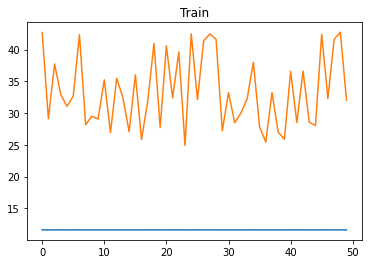

2/2 [==============================] - 3s 18ms/step


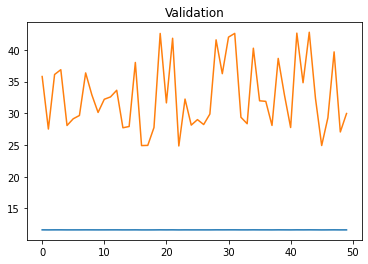

3/3 [==============================] - 0s 6ms/step


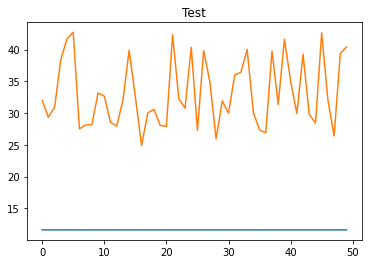

3/3 [==============================] - 0s 15ms/step


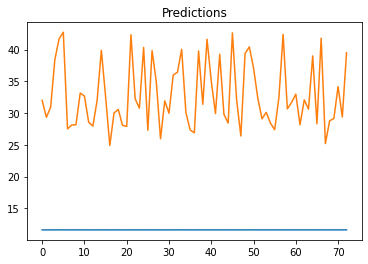

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

476.2195049909899

## Moving Average

### CNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1020.1268 - root_mean_squared_error: 31.9394

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 4s/step - loss: 1022.0897 - root_mean_squared_error: 31.9701 - val_loss: 1067.5433 - val_root_mean_squared_error: 32.6733
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 999.4938 - root_mean_squared_error: 31.6148

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 999.0103 - root_mean_squared_error: 31.6071 - val_loss: 1046.8823 - val_root_mean_squared_error: 32.3556
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 979.9412 - root_mean_squared_error: 31.3040

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 979.9412 - root_mean_squared_error: 31.3040 - val_loss: 1029.0336 - val_root_mean_squared_error: 32.0786
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 957.9319 - root_mean_squared_error: 30.9505

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 963.0853 - root_mean_squared_error: 31.0336 - val_loss: 1012.7277 - val_root_mean_squared_error: 31.8234
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 947.3280 - root_mean_squared_error: 30.7787

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 947.3280 - root_mean_squared_error: 30.7787 - val_loss: 997.1106 - val_root_mean_squared_error: 31.5771
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 932.2371 - root_mean_squared_error: 30.5326

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 932.2371 - root_mean_squared_error: 30.5326 - val_loss: 981.9026 - val_root_mean_squared_error: 31.3353
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 917.4742 - root_mean_squared_error: 30.2898

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 917.4742 - root_mean_squared_error: 30.2898 - val_loss: 966.9796 - val_root_mean_squared_error: 31.0963
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 903.0308 - root_mean_squared_error: 30.0505

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 903.0308 - root_mean_squared_error: 30.0505 - val_loss: 952.4089 - val_root_mean_squared_error: 30.8611
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 892.2046 - root_mean_squared_error: 29.8698

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 889.0358 - root_mean_squared_error: 29.8167 - val_loss: 938.3978 - val_root_mean_squared_error: 30.6333
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 874.7280 - root_mean_squared_error: 29.5758

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 875.5842 - root_mean_squared_error: 29.5903 - val_loss: 924.7394 - val_root_mean_squared_error: 30.4095
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 863.4509 - root_mean_squared_error: 29.3845

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 862.4272 - root_mean_squared_error: 29.3671 - val_loss: 911.2192 - val_root_mean_squared_error: 30.1864
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 849.4086 - root_mean_squared_error: 29.1446

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 849.4086 - root_mean_squared_error: 29.1446 - val_loss: 897.7397 - val_root_mean_squared_error: 29.9623
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 836.1963 - root_mean_squared_error: 28.9171

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 836.1963 - root_mean_squared_error: 28.9171 - val_loss: 884.2955 - val_root_mean_squared_error: 29.7371
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 826.5280 - root_mean_squared_error: 28.7494

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 823.8337 - root_mean_squared_error: 28.7025 - val_loss: 872.5621 - val_root_mean_squared_error: 29.5392
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 812.6063 - root_mean_squared_error: 28.5063

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 812.6063 - root_mean_squared_error: 28.5063 - val_loss: 861.2610 - val_root_mean_squared_error: 29.3472
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 801.9035 - root_mean_squared_error: 28.3179

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 801.9035 - root_mean_squared_error: 28.3179 - val_loss: 850.5711 - val_root_mean_squared_error: 29.1646
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 786.3004 - root_mean_squared_error: 28.0410

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 791.8018 - root_mean_squared_error: 28.1390 - val_loss: 840.5007 - val_root_mean_squared_error: 28.9914
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 782.5390 - root_mean_squared_error: 27.9739

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 782.3548 - root_mean_squared_error: 27.9706 - val_loss: 831.0566 - val_root_mean_squared_error: 28.8281
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 770.0665 - root_mean_squared_error: 27.7501

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 773.5881 - root_mean_squared_error: 27.8135 - val_loss: 822.3909 - val_root_mean_squared_error: 28.6774
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 768.5296 - root_mean_squared_error: 27.7224

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 765.5777 - root_mean_squared_error: 27.6691 - val_loss: 814.3588 - val_root_mean_squared_error: 28.5370
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 754.1613 - root_mean_squared_error: 27.4620

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 758.0413 - root_mean_squared_error: 27.5325 - val_loss: 806.9396 - val_root_mean_squared_error: 28.4067
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 753.8763 - root_mean_squared_error: 27.4568

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 751.0528 - root_mean_squared_error: 27.4053 - val_loss: 799.8560 - val_root_mean_squared_error: 28.2817
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 741.7388 - root_mean_squared_error: 27.2349

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 744.3496 - root_mean_squared_error: 27.2828 - val_loss: 793.0916 - val_root_mean_squared_error: 28.1619
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 737.8845 - root_mean_squared_error: 27.1640

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 737.8845 - root_mean_squared_error: 27.1640 - val_loss: 786.4953 - val_root_mean_squared_error: 28.0445
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 729.6833 - root_mean_squared_error: 27.0127

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 731.5432 - root_mean_squared_error: 27.0471 - val_loss: 780.0519 - val_root_mean_squared_error: 27.9294
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 724.0020 - root_mean_squared_error: 26.9073

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 725.3761 - root_mean_squared_error: 26.9328 - val_loss: 773.7365 - val_root_mean_squared_error: 27.8161
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 721.2114 - root_mean_squared_error: 26.8554

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 719.3431 - root_mean_squared_error: 26.8206 - val_loss: 767.5262 - val_root_mean_squared_error: 27.7043
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 710.1175 - root_mean_squared_error: 26.6480

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 713.4182 - root_mean_squared_error: 26.7099 - val_loss: 761.4421 - val_root_mean_squared_error: 27.5942
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 704.1703 - root_mean_squared_error: 26.5362

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 707.5538 - root_mean_squared_error: 26.5999 - val_loss: 755.4370 - val_root_mean_squared_error: 27.4852
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 697.5059 - root_mean_squared_error: 26.4103

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 3s 14ms/step


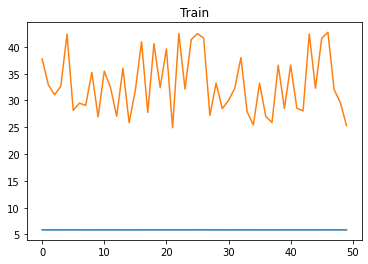

2/2 [==============================] - 2s 18ms/step


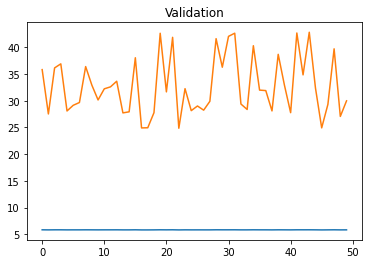

3/3 [==============================] - 0s 43ms/step


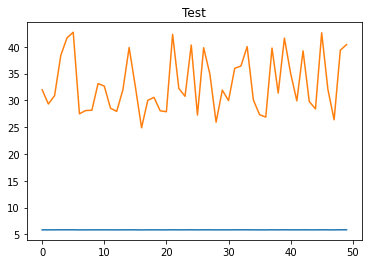

3/3 [==============================] - 0s 8ms/step


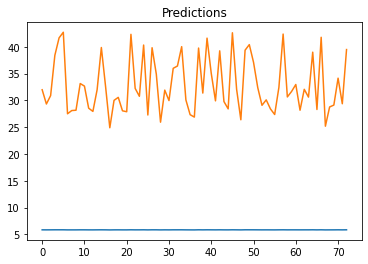

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

753.3079742995232

### RNN LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1005.9079 - root_mean_squared_error: 31.7161 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 2s/step - loss: 1005.4672 - root_mean_squared_error: 31.7091 - val_loss: 1059.3508 - val_root_mean_squared_error: 32.5477
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 999.2680 - root_mean_squared_error: 31.6112

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 994.2035 - root_mean_squared_error: 31.5310 - val_loss: 1047.6498 - val_root_mean_squared_error: 32.3674
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 985.0074 - root_mean_squared_error: 31.3848

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 982.8086 - root_mean_squared_error: 31.3498 - val_loss: 1035.9261 - val_root_mean_squared_error: 32.1858
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 966.0253 - root_mean_squared_error: 31.0809

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 971.3788 - root_mean_squared_error: 31.1670 - val_loss: 1024.1010 - val_root_mean_squared_error: 32.0016
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 952.0688 - root_mean_squared_error: 30.8556

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 959.8558 - root_mean_squared_error: 30.9815 - val_loss: 1012.1686 - val_root_mean_squared_error: 31.8146
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 950.0253 - root_mean_squared_error: 30.8225

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 948.2785 - root_mean_squared_error: 30.7941 - val_loss: 1000.2665 - val_root_mean_squared_error: 31.6270
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 938.5569 - root_mean_squared_error: 30.6359 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 936.7985 - root_mean_squared_error: 30.6072 - val_loss: 988.3992 - val_root_mean_squared_error: 31.4388
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 925.8997 - root_mean_squared_error: 30.4286 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 925.3425 - root_mean_squared_error: 30.4194 - val_loss: 976.6331 - val_root_mean_squared_error: 31.2511
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 909.7393 - root_mean_squared_error: 30.1619

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 913.8708 - root_mean_squared_error: 30.2303 - val_loss: 965.0343 - val_root_mean_squared_error: 31.0650
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 921.6164 - root_mean_squared_error: 30.3581

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 902.7433 - root_mean_squared_error: 30.0457 - val_loss: 953.4637 - val_root_mean_squared_error: 30.8782
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 892.8922 - root_mean_squared_error: 29.8813

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 891.5142 - root_mean_squared_error: 29.8582 - val_loss: 942.1003 - val_root_mean_squared_error: 30.6937
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 876.4404 - root_mean_squared_error: 29.6047

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 880.5764 - root_mean_squared_error: 29.6745 - val_loss: 930.8351 - val_root_mean_squared_error: 30.5096
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 874.2075 - root_mean_squared_error: 29.5670

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 869.6472 - root_mean_squared_error: 29.4898 - val_loss: 919.6083 - val_root_mean_squared_error: 30.3250
Epoch 14/30
4/8 [==============>...............] - ETA: 0s - loss: 883.6360 - root_mean_squared_error: 29.7260

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 858.8044 - root_mean_squared_error: 29.3054 - val_loss: 908.4501 - val_root_mean_squared_error: 30.1405
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 846.0909 - root_mean_squared_error: 29.0876

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 847.9443 - root_mean_squared_error: 29.1195 - val_loss: 897.4200 - val_root_mean_squared_error: 29.9570
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 852.2703 - root_mean_squared_error: 29.1937

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 837.3327 - root_mean_squared_error: 28.9367 - val_loss: 886.4401 - val_root_mean_squared_error: 29.7731
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 809.6450 - root_mean_squared_error: 28.4543

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 826.6879 - root_mean_squared_error: 28.7522 - val_loss: 875.6885 - val_root_mean_squared_error: 29.5920
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 821.3112 - root_mean_squared_error: 28.6585

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 816.2948 - root_mean_squared_error: 28.5709 - val_loss: 864.9349 - val_root_mean_squared_error: 29.4098
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 813.0427 - root_mean_squared_error: 28.5139

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 805.9315 - root_mean_squared_error: 28.3889 - val_loss: 854.4191 - val_root_mean_squared_error: 29.2304
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 797.0748 - root_mean_squared_error: 28.2325

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 795.8084 - root_mean_squared_error: 28.2101 - val_loss: 844.0477 - val_root_mean_squared_error: 29.0525
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 784.6063 - root_mean_squared_error: 28.0108

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 785.7927 - root_mean_squared_error: 28.0320 - val_loss: 833.9091 - val_root_mean_squared_error: 28.8775
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 784.3654 - root_mean_squared_error: 28.0065

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 776.0516 - root_mean_squared_error: 27.8577 - val_loss: 823.9433 - val_root_mean_squared_error: 28.7044
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 766.5451 - root_mean_squared_error: 27.6866

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 766.5451 - root_mean_squared_error: 27.6866 - val_loss: 814.2408 - val_root_mean_squared_error: 28.5349
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 757.2650 - root_mean_squared_error: 27.5184

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 757.2650 - root_mean_squared_error: 27.5184 - val_loss: 804.8600 - val_root_mean_squared_error: 28.3701
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 747.4658 - root_mean_squared_error: 27.3398

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 748.2562 - root_mean_squared_error: 27.3543 - val_loss: 795.7872 - val_root_mean_squared_error: 28.2097
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 737.4841 - root_mean_squared_error: 27.1567

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 739.6064 - root_mean_squared_error: 27.1957 - val_loss: 786.9631 - val_root_mean_squared_error: 28.0529
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 726.6948 - root_mean_squared_error: 26.9573

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 731.2010 - root_mean_squared_error: 27.0407 - val_loss: 778.4941 - val_root_mean_squared_error: 27.9015
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 721.6507 - root_mean_squared_error: 26.8636

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 723.1314 - root_mean_squared_error: 26.8911 - val_loss: 770.2915 - val_root_mean_squared_error: 27.7541
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 713.8460 - root_mean_squared_error: 26.7179

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 715.2762 - root_mean_squared_error: 26.7446 - val_loss: 762.3807 - val_root_mean_squared_error: 27.6112
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 705.5585 - root_mean_squared_error: 26.5624

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 12ms/step


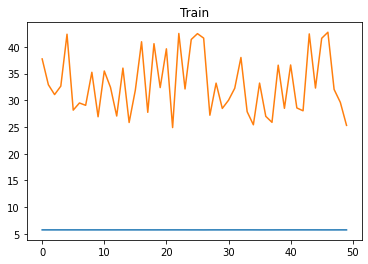

2/2 [==============================] - 2s 6ms/step


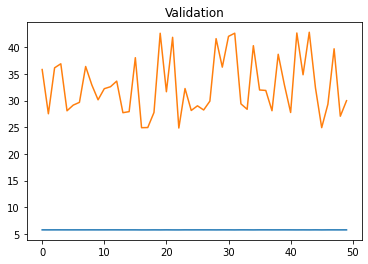

3/3 [==============================] - 0s 9ms/step


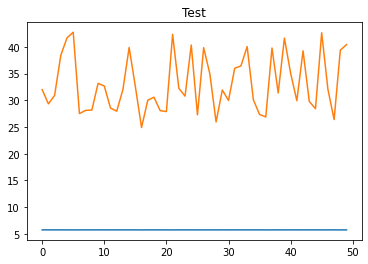

3/3 [==============================] - 0s 8ms/step


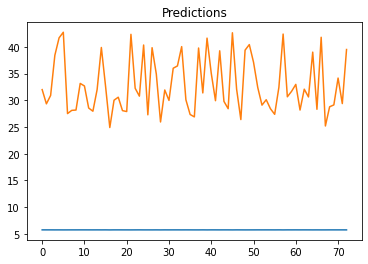

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

758.441624267178

### RNN GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 995.9975 - root_mean_squared_error: 31.5594 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 22s 2s/step - loss: 1015.6351 - root_mean_squared_error: 31.8690 - val_loss: 1066.2560 - val_root_mean_squared_error: 32.6536
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 996.2535 - root_mean_squared_error: 31.5635 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 998.1359 - root_mean_squared_error: 31.5933 - val_loss: 1048.3152 - val_root_mean_squared_error: 32.3777
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 984.4755 - root_mean_squared_error: 31.3764

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 980.8428 - root_mean_squared_error: 31.3184 - val_loss: 1030.6305 - val_root_mean_squared_error: 32.1034
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 963.7589 - root_mean_squared_error: 31.0445

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 963.7589 - root_mean_squared_error: 31.0445 - val_loss: 1013.1655 - val_root_mean_squared_error: 31.8303
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 962.4191 - root_mean_squared_error: 31.0229 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 946.8458 - root_mean_squared_error: 30.7709 - val_loss: 995.8762 - val_root_mean_squared_error: 31.5575
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 930.0839 - root_mean_squared_error: 30.4973

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 930.0839 - root_mean_squared_error: 30.4973 - val_loss: 978.7808 - val_root_mean_squared_error: 31.2855
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 901.6900 - root_mean_squared_error: 30.0282

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 913.5405 - root_mean_squared_error: 30.2248 - val_loss: 962.0093 - val_root_mean_squared_error: 31.0163
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 906.8707 - root_mean_squared_error: 30.1143 

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 897.3877 - root_mean_squared_error: 29.9564 - val_loss: 945.3964 - val_root_mean_squared_error: 30.7473
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 864.8984 - root_mean_squared_error: 29.4092

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 881.2280 - root_mean_squared_error: 29.6855 - val_loss: 929.0421 - val_root_mean_squared_error: 30.4802
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 862.6378 - root_mean_squared_error: 29.3707

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 865.4830 - root_mean_squared_error: 29.4191 - val_loss: 913.0469 - val_root_mean_squared_error: 30.2167
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 849.8172 - root_mean_squared_error: 29.1516

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 850.1151 - root_mean_squared_error: 29.1567 - val_loss: 897.3391 - val_root_mean_squared_error: 29.9556
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 835.0541 - root_mean_squared_error: 28.8973

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 835.0541 - root_mean_squared_error: 28.8973 - val_loss: 882.0417 - val_root_mean_squared_error: 29.6992
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 820.3769 - root_mean_squared_error: 28.6422

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 820.3769 - root_mean_squared_error: 28.6422 - val_loss: 867.1426 - val_root_mean_squared_error: 29.4473
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 807.2134 - root_mean_squared_error: 28.4115

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 806.1470 - root_mean_squared_error: 28.3927 - val_loss: 852.7361 - val_root_mean_squared_error: 29.2016
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 786.6234 - root_mean_squared_error: 28.0468

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 792.4296 - root_mean_squared_error: 28.1501 - val_loss: 838.9747 - val_root_mean_squared_error: 28.9651
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 786.5247 - root_mean_squared_error: 28.0450

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 779.3112 - root_mean_squared_error: 27.9161 - val_loss: 825.7584 - val_root_mean_squared_error: 28.7360
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 768.5580 - root_mean_squared_error: 27.7229

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 766.8007 - root_mean_squared_error: 27.6912 - val_loss: 813.2391 - val_root_mean_squared_error: 28.5173
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 756.8973 - root_mean_squared_error: 27.5118

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 754.9405 - root_mean_squared_error: 27.4762 - val_loss: 801.4006 - val_root_mean_squared_error: 28.3090
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 758.8707 - root_mean_squared_error: 27.5476

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 743.7868 - root_mean_squared_error: 27.2725 - val_loss: 790.2166 - val_root_mean_squared_error: 28.1108
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 736.1314 - root_mean_squared_error: 27.1317

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 733.2101 - root_mean_squared_error: 27.0779 - val_loss: 779.6550 - val_root_mean_squared_error: 27.9223
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 729.1411 - root_mean_squared_error: 27.0026

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 723.2281 - root_mean_squared_error: 26.8929 - val_loss: 769.7202 - val_root_mean_squared_error: 27.7438
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 723.0388 - root_mean_squared_error: 26.8894

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 713.8966 - root_mean_squared_error: 26.7188 - val_loss: 760.3229 - val_root_mean_squared_error: 27.5740
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 704.9520 - root_mean_squared_error: 26.5509

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 704.9520 - root_mean_squared_error: 26.5509 - val_loss: 751.3837 - val_root_mean_squared_error: 27.4114
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 711.0914 - root_mean_squared_error: 26.6663

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 696.5093 - root_mean_squared_error: 26.3915 - val_loss: 742.7893 - val_root_mean_squared_error: 27.2542
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 683.6041 - root_mean_squared_error: 26.1458

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 688.3168 - root_mean_squared_error: 26.2358 - val_loss: 734.6628 - val_root_mean_squared_error: 27.1047
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 680.6867 - root_mean_squared_error: 26.0900

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 680.5591 - root_mean_squared_error: 26.0875 - val_loss: 726.8765 - val_root_mean_squared_error: 26.9606
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 653.6392 - root_mean_squared_error: 25.5664

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 673.1308 - root_mean_squared_error: 25.9448 - val_loss: 719.5598 - val_root_mean_squared_error: 26.8246
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 665.0708 - root_mean_squared_error: 25.7890

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 666.1807 - root_mean_squared_error: 25.8105 - val_loss: 712.6230 - val_root_mean_squared_error: 26.6950
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 670.0820 - root_mean_squared_error: 25.8859

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 659.6575 - root_mean_squared_error: 25.6838 - val_loss: 706.1589 - val_root_mean_squared_error: 26.5737
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 647.8626 - root_mean_squared_error: 25.4531

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 2s 6ms/step


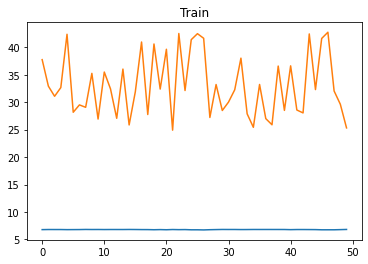

2/2 [==============================] - 1s 6ms/step


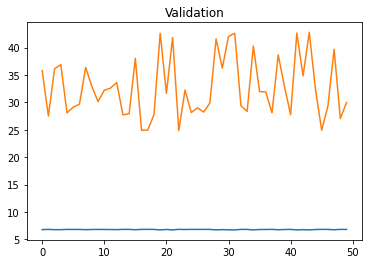

3/3 [==============================] - 0s 7ms/step


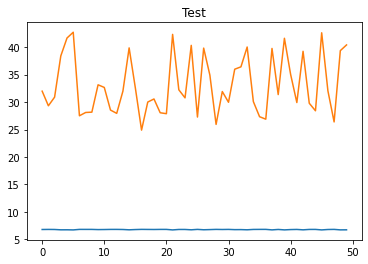

3/3 [==============================] - 0s 7ms/step


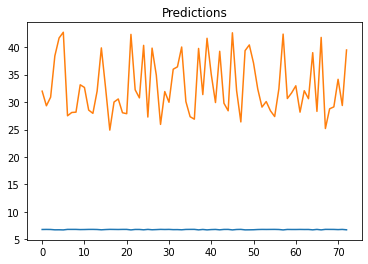

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

703.9003704647108

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1055.8099 - root_mean_squared_error: 32.4932

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 32s 3s/step - loss: 1055.8129 - root_mean_squared_error: 32.4933 - val_loss: 1096.4622 - val_root_mean_squared_error: 33.1129
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 1021.1312 - root_mean_squared_error: 31.9551

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1025.3365 - root_mean_squared_error: 32.0209 - val_loss: 1066.7571 - val_root_mean_squared_error: 32.6612
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 997.1954 - root_mean_squared_error: 31.5784 

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 996.8454 - root_mean_squared_error: 31.5729 - val_loss: 1039.0088 - val_root_mean_squared_error: 32.2337
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 970.3549 - root_mean_squared_error: 31.1505

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 970.3549 - root_mean_squared_error: 31.1505 - val_loss: 1013.5093 - val_root_mean_squared_error: 31.8357
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 949.8804 - root_mean_squared_error: 30.8201

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 946.0333 - root_mean_squared_error: 30.7577 - val_loss: 990.0561 - val_root_mean_squared_error: 31.4652
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 924.2591 - root_mean_squared_error: 30.4016

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 923.5590 - root_mean_squared_error: 30.3901 - val_loss: 968.3086 - val_root_mean_squared_error: 31.1177
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 906.0917 - root_mean_squared_error: 30.1014

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 902.6785 - root_mean_squared_error: 30.0446 - val_loss: 947.8182 - val_root_mean_squared_error: 30.7867
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 883.0298 - root_mean_squared_error: 29.7158

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 883.0298 - root_mean_squared_error: 29.7158 - val_loss: 928.3331 - val_root_mean_squared_error: 30.4686
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 867.4874 - root_mean_squared_error: 29.4531

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 864.1910 - root_mean_squared_error: 29.3971 - val_loss: 909.5763 - val_root_mean_squared_error: 30.1592
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 838.8505 - root_mean_squared_error: 28.9629

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 846.0266 - root_mean_squared_error: 29.0865 - val_loss: 891.3641 - val_root_mean_squared_error: 29.8557
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 830.9113 - root_mean_squared_error: 28.8255

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 828.3439 - root_mean_squared_error: 28.7810 - val_loss: 873.4398 - val_root_mean_squared_error: 29.5540
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 810.9602 - root_mean_squared_error: 28.4774

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 810.9602 - root_mean_squared_error: 28.4774 - val_loss: 856.0717 - val_root_mean_squared_error: 29.2587
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 788.0485 - root_mean_squared_error: 28.0722

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 794.0314 - root_mean_squared_error: 28.1786 - val_loss: 839.1021 - val_root_mean_squared_error: 28.9673
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 778.9097 - root_mean_squared_error: 27.9090

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 777.5717 - root_mean_squared_error: 27.8850 - val_loss: 822.6095 - val_root_mean_squared_error: 28.6812
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 760.1802 - root_mean_squared_error: 27.5714

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 761.7112 - root_mean_squared_error: 27.5991 - val_loss: 806.9113 - val_root_mean_squared_error: 28.4062
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 743.8593 - root_mean_squared_error: 27.2738

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 746.6618 - root_mean_squared_error: 27.3251 - val_loss: 792.0887 - val_root_mean_squared_error: 28.1441
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 731.5322 - root_mean_squared_error: 27.0469

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 732.5664 - root_mean_squared_error: 27.0660 - val_loss: 778.3165 - val_root_mean_squared_error: 27.8983
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 718.8941 - root_mean_squared_error: 26.8122

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 719.5956 - root_mean_squared_error: 26.8253 - val_loss: 765.6976 - val_root_mean_squared_error: 27.6712
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 707.2211 - root_mean_squared_error: 26.5936

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 707.7655 - root_mean_squared_error: 26.6039 - val_loss: 754.1874 - val_root_mean_squared_error: 27.4625
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 694.6605 - root_mean_squared_error: 26.3564

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 696.9996 - root_mean_squared_error: 26.4008 - val_loss: 743.6810 - val_root_mean_squared_error: 27.2705
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 685.4028 - root_mean_squared_error: 26.1802

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 687.1906 - root_mean_squared_error: 26.2143 - val_loss: 734.1112 - val_root_mean_squared_error: 27.0945
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 673.9503 - root_mean_squared_error: 25.9606

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 678.3154 - root_mean_squared_error: 26.0445 - val_loss: 725.4838 - val_root_mean_squared_error: 26.9348
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 668.9263 - root_mean_squared_error: 25.8636

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 670.3625 - root_mean_squared_error: 25.8914 - val_loss: 717.7410 - val_root_mean_squared_error: 26.7907
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 664.6508 - root_mean_squared_error: 25.7808

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 663.3342 - root_mean_squared_error: 25.7553 - val_loss: 710.7953 - val_root_mean_squared_error: 26.6607
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 656.1486 - root_mean_squared_error: 25.6154

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 657.0006 - root_mean_squared_error: 25.6320 - val_loss: 704.5571 - val_root_mean_squared_error: 26.5435
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 655.6652 - root_mean_squared_error: 25.6060

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 651.2825 - root_mean_squared_error: 25.5202 - val_loss: 698.8405 - val_root_mean_squared_error: 26.4356
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 641.7933 - root_mean_squared_error: 25.3336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 646.0189 - root_mean_squared_error: 25.4169 - val_loss: 693.5980 - val_root_mean_squared_error: 26.3362
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 643.6108 - root_mean_squared_error: 25.3695

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 641.1973 - root_mean_squared_error: 25.3219 - val_loss: 688.6725 - val_root_mean_squared_error: 26.2426
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 636.9163 - root_mean_squared_error: 25.2372

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 636.6888 - root_mean_squared_error: 25.2327 - val_loss: 684.1312 - val_root_mean_squared_error: 26.1559
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 631.3862 - root_mean_squared_error: 25.1274

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 3s 14ms/step


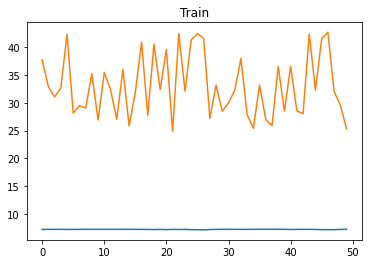

2/2 [==============================] - 2s 18ms/step


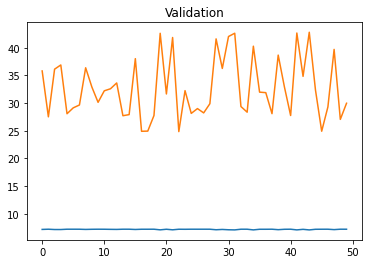

3/3 [==============================] - 0s 22ms/step


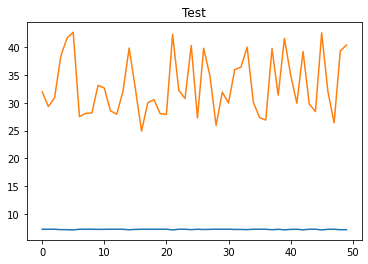

3/3 [==============================] - 0s 7ms/step


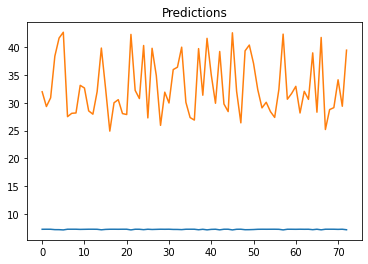

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

683.4738577159246

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 1020.6807 - root_mean_squared_error: 31.9481

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 28s 2s/step - loss: 1021.5245 - root_mean_squared_error: 31.9613 - val_loss: 1063.0015 - val_root_mean_squared_error: 32.6037
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 988.8961 - root_mean_squared_error: 31.4467 

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 988.8961 - root_mean_squared_error: 31.4467 - val_loss: 1030.6873 - val_root_mean_squared_error: 32.1043
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 959.0145 - root_mean_squared_error: 30.9680

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 959.0145 - root_mean_squared_error: 30.9680 - val_loss: 1001.9910 - val_root_mean_squared_error: 31.6542
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 932.5931 - root_mean_squared_error: 30.5384

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 932.5931 - root_mean_squared_error: 30.5384 - val_loss: 976.3527 - val_root_mean_squared_error: 31.2466
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 908.6325 - root_mean_squared_error: 30.1435

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 908.6325 - root_mean_squared_error: 30.1435 - val_loss: 952.7692 - val_root_mean_squared_error: 30.8670
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 886.5010 - root_mean_squared_error: 29.7742

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 886.3839 - root_mean_squared_error: 29.7722 - val_loss: 930.8478 - val_root_mean_squared_error: 30.5098
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 870.0249 - root_mean_squared_error: 29.4962

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 865.6834 - root_mean_squared_error: 29.4225 - val_loss: 910.5172 - val_root_mean_squared_error: 30.1748
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 846.5433 - root_mean_squared_error: 29.0954

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 846.5433 - root_mean_squared_error: 29.0954 - val_loss: 891.6232 - val_root_mean_squared_error: 29.8601
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 828.6096 - root_mean_squared_error: 28.7856

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 828.6096 - root_mean_squared_error: 28.7856 - val_loss: 873.6567 - val_root_mean_squared_error: 29.5577
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 807.6535 - root_mean_squared_error: 28.4192

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 811.7270 - root_mean_squared_error: 28.4908 - val_loss: 856.6728 - val_root_mean_squared_error: 29.2690
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 795.7261 - root_mean_squared_error: 28.2086

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 795.7261 - root_mean_squared_error: 28.2086 - val_loss: 840.5655 - val_root_mean_squared_error: 28.9925
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 780.5421 - root_mean_squared_error: 27.9382

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 780.5421 - root_mean_squared_error: 27.9382 - val_loss: 825.2036 - val_root_mean_squared_error: 28.7264
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 765.9733 - root_mean_squared_error: 27.6762

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 765.9733 - root_mean_squared_error: 27.6762 - val_loss: 810.5375 - val_root_mean_squared_error: 28.4699
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 752.0955 - root_mean_squared_error: 27.4244

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 751.9249 - root_mean_squared_error: 27.4212 - val_loss: 796.2996 - val_root_mean_squared_error: 28.2188
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 735.8823 - root_mean_squared_error: 27.1272

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 738.2916 - root_mean_squared_error: 27.1715 - val_loss: 782.3253 - val_root_mean_squared_error: 27.9701
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 727.7874 - root_mean_squared_error: 26.9775

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 724.7336 - root_mean_squared_error: 26.9209 - val_loss: 768.5209 - val_root_mean_squared_error: 27.7222
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 703.5178 - root_mean_squared_error: 26.5239

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 711.3040 - root_mean_squared_error: 26.6703 - val_loss: 754.7820 - val_root_mean_squared_error: 27.4733
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 697.7623 - root_mean_squared_error: 26.4152

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 697.7623 - root_mean_squared_error: 26.4152 - val_loss: 741.0897 - val_root_mean_squared_error: 27.2230
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 683.0276 - root_mean_squared_error: 26.1348

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 684.3434 - root_mean_squared_error: 26.1600 - val_loss: 727.3883 - val_root_mean_squared_error: 26.9701
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 671.8633 - root_mean_squared_error: 25.9203

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 670.8740 - root_mean_squared_error: 25.9012 - val_loss: 713.5480 - val_root_mean_squared_error: 26.7123
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 657.4648 - root_mean_squared_error: 25.6411

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 657.4648 - root_mean_squared_error: 25.6411 - val_loss: 699.5253 - val_root_mean_squared_error: 26.4485
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 644.2188 - root_mean_squared_error: 25.3815

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 644.2188 - root_mean_squared_error: 25.3815 - val_loss: 685.9611 - val_root_mean_squared_error: 26.1909
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 631.5510 - root_mean_squared_error: 25.1307

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 631.5510 - root_mean_squared_error: 25.1307 - val_loss: 673.1412 - val_root_mean_squared_error: 25.9450
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 612.0727 - root_mean_squared_error: 24.7401

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 619.6674 - root_mean_squared_error: 24.8931 - val_loss: 661.3144 - val_root_mean_squared_error: 25.7160
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 611.2988 - root_mean_squared_error: 24.7245

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 608.8049 - root_mean_squared_error: 24.6740 - val_loss: 650.5808 - val_root_mean_squared_error: 25.5065
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 598.3798 - root_mean_squared_error: 24.4618

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 598.9964 - root_mean_squared_error: 24.4744 - val_loss: 640.9534 - val_root_mean_squared_error: 25.3171
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 588.8581 - root_mean_squared_error: 24.2664

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 590.1542 - root_mean_squared_error: 24.2931 - val_loss: 632.1856 - val_root_mean_squared_error: 25.1433
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 585.5220 - root_mean_squared_error: 24.1976

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 582.0172 - root_mean_squared_error: 24.1250 - val_loss: 624.1266 - val_root_mean_squared_error: 24.9825
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 573.4295 - root_mean_squared_error: 23.9464

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 574.5089 - root_mean_squared_error: 23.9689 - val_loss: 616.6362 - val_root_mean_squared_error: 24.8322
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 584.0402 - root_mean_squared_error: 24.1669

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 1s 14ms/step


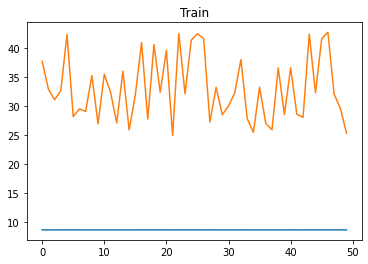

2/2 [==============================] - 2s 10ms/step


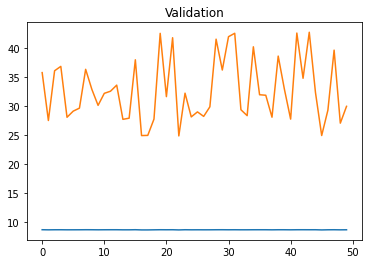

3/3 [==============================] - 0s 7ms/step


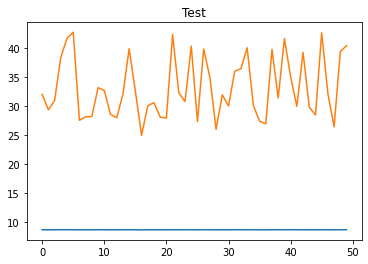

3/3 [==============================] - 0s 9ms/step


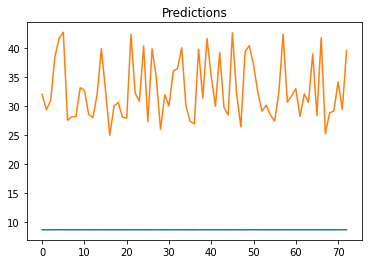

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

612.6814908687707

### RNN LSTM GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 1009.5720 - root_mean_squared_error: 31.7738

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 4s/step - loss: 1004.6905 - root_mean_squared_error: 31.6969 - val_loss: 1046.8386 - val_root_mean_squared_error: 32.3549
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 977.2985 - root_mean_squared_error: 31.2618

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 974.4507 - root_mean_squared_error: 31.2162 - val_loss: 1014.9283 - val_root_mean_squared_error: 31.8579
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 942.8262 - root_mean_squared_error: 30.7055

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 942.8262 - root_mean_squared_error: 30.7055 - val_loss: 981.0113 - val_root_mean_squared_error: 31.3211
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 913.5586 - root_mean_squared_error: 30.2251

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 908.9901 - root_mean_squared_error: 30.1495 - val_loss: 944.2924 - val_root_mean_squared_error: 30.7293
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 874.2908 - root_mean_squared_error: 29.5684

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 872.2649 - root_mean_squared_error: 29.5341 - val_loss: 904.4939 - val_root_mean_squared_error: 30.0748
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 841.3154 - root_mean_squared_error: 29.0054

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 832.3821 - root_mean_squared_error: 28.8510 - val_loss: 861.3500 - val_root_mean_squared_error: 29.3488
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 788.8493 - root_mean_squared_error: 28.0865

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 789.8856 - root_mean_squared_error: 28.1049 - val_loss: 815.7787 - val_root_mean_squared_error: 28.5618
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 745.1891 - root_mean_squared_error: 27.2982

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 745.1891 - root_mean_squared_error: 27.2982 - val_loss: 768.9164 - val_root_mean_squared_error: 27.7293
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 697.4363 - root_mean_squared_error: 26.4090

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 699.9238 - root_mean_squared_error: 26.4561 - val_loss: 723.0610 - val_root_mean_squared_error: 26.8898
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 656.6804 - root_mean_squared_error: 25.6258

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 656.6804 - root_mean_squared_error: 25.6258 - val_loss: 680.2850 - val_root_mean_squared_error: 26.0823
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 616.0472 - root_mean_squared_error: 24.8203

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 617.2552 - root_mean_squared_error: 24.8446 - val_loss: 642.7179 - val_root_mean_squared_error: 25.3519
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 585.8576 - root_mean_squared_error: 24.2045

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 583.2244 - root_mean_squared_error: 24.1500 - val_loss: 611.3264 - val_root_mean_squared_error: 24.7250
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 554.4696 - root_mean_squared_error: 23.5472

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 555.4930 - root_mean_squared_error: 23.5689 - val_loss: 586.1818 - val_root_mean_squared_error: 24.2112
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 524.1465 - root_mean_squared_error: 22.8942

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 533.2656 - root_mean_squared_error: 23.0925 - val_loss: 566.5272 - val_root_mean_squared_error: 23.8018
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 520.4989 - root_mean_squared_error: 22.8144

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 516.2114 - root_mean_squared_error: 22.7203 - val_loss: 551.2297 - val_root_mean_squared_error: 23.4783
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 502.8748 - root_mean_squared_error: 22.4249

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 502.8748 - root_mean_squared_error: 22.4249 - val_loss: 539.2839 - val_root_mean_squared_error: 23.2225
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 492.2942 - root_mean_squared_error: 22.1877

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 492.2942 - root_mean_squared_error: 22.1877 - val_loss: 529.8038 - val_root_mean_squared_error: 23.0175
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 483.9037 - root_mean_squared_error: 21.9978

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 483.9037 - root_mean_squared_error: 21.9978 - val_loss: 521.9924 - val_root_mean_squared_error: 22.8472
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 476.9934 - root_mean_squared_error: 21.8402

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 476.9934 - root_mean_squared_error: 21.8402 - val_loss: 515.4845 - val_root_mean_squared_error: 22.7043
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 475.1422 - root_mean_squared_error: 21.7978

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 471.1076 - root_mean_squared_error: 21.7050 - val_loss: 509.9023 - val_root_mean_squared_error: 22.5810
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 466.8950 - root_mean_squared_error: 21.6078

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 466.0067 - root_mean_squared_error: 21.5872 - val_loss: 504.9921 - val_root_mean_squared_error: 22.4720
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 461.5057 - root_mean_squared_error: 21.4827

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 461.5057 - root_mean_squared_error: 21.4827 - val_loss: 500.5870 - val_root_mean_squared_error: 22.3738
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 457.2056 - root_mean_squared_error: 21.3824

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 457.4185 - root_mean_squared_error: 21.3873 - val_loss: 496.5504 - val_root_mean_squared_error: 22.2834
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 452.8506 - root_mean_squared_error: 21.2803

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 453.6444 - root_mean_squared_error: 21.2989 - val_loss: 492.7617 - val_root_mean_squared_error: 22.1982
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 451.2691 - root_mean_squared_error: 21.2431

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 450.1075 - root_mean_squared_error: 21.2157 - val_loss: 489.1683 - val_root_mean_squared_error: 22.1171
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 446.7397 - root_mean_squared_error: 21.1362

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 446.7397 - root_mean_squared_error: 21.1362 - val_loss: 485.7635 - val_root_mean_squared_error: 22.0400
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 448.7590 - root_mean_squared_error: 21.1839

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 443.5443 - root_mean_squared_error: 21.0605 - val_loss: 482.5002 - val_root_mean_squared_error: 21.9659
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 440.4725 - root_mean_squared_error: 20.9874

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 440.4725 - root_mean_squared_error: 20.9874 - val_loss: 479.3656 - val_root_mean_squared_error: 21.8944
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 442.8339 - root_mean_squared_error: 21.0436

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 437.5177 - root_mean_squared_error: 20.9169 - val_loss: 476.3217 - val_root_mean_squared_error: 21.8248
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 431.6379 - root_mean_squared_error: 20.7759

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 3s 10ms/step


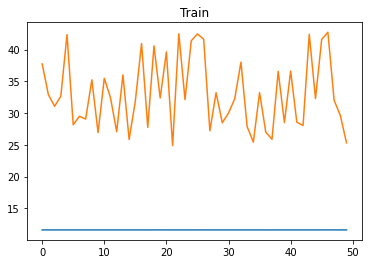

2/2 [==============================] - 2s 9ms/step


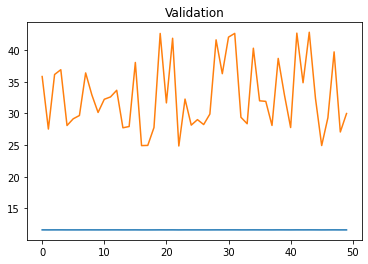

3/3 [==============================] - 0s 53ms/step


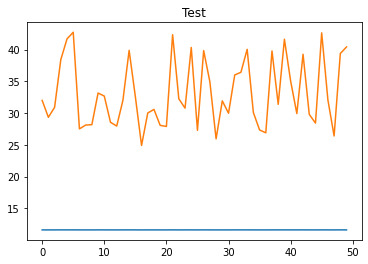

3/3 [==============================] - 0s 12ms/step


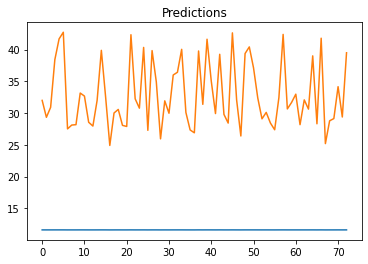

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

476.0950684663255

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,837.367424,28.937302
1,rnn,781.802620,27.960734
2,gru,895.084086,29.917956
3,lstm,1043.371775,32.301266
4,mvg_cnn,306.914358,17.518971
5,mvg_rnn,774.473816,27.829370
6,mvg_gru,896.353297,29.939160
7,mvg_lstm,947.220877,30.776954
8,auto_cnn,0.879791,0.937972
9,auto_rnn,771.595306,27.777604


In [55]:
msedf.to_csv("msedfBODD.csv", index= False)

<AxesSubplot:xlabel='Model'>

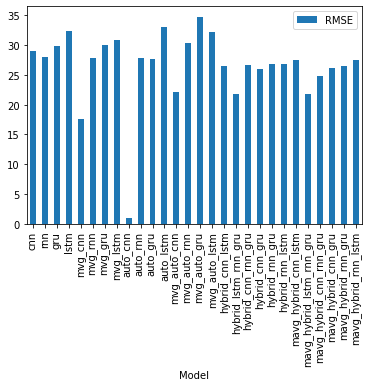

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)